In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import requests
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

import re

# IQR/Z score.
from scipy.stats import stats

# Seleción de variables.
from sklearn.feature_selection import SelectKBest

# Modelos Selección.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Modelos.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

# Preprocesado.
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
import pickle
# Métricas.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Leer los archivos CSV
train_values = pd.read_csv("C:/Users/Fran/Desktop/Master/maching learning tarea/4910797b-ee55-40a7-8668-10efd5c1b960.csv")
train_labels = pd.read_csv("C:/Users/Fran/Desktop/Master/maching learning tarea/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
test_values = pd.read_csv("C:/Users/Fran/Desktop/Master/maching learning tarea/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")


## Cargar los datasets y construir un único tablón analítico con todas las variables

In [4]:
print('Tamaño de tabla de train_values:',train_values.shape[0])
print('Tamaño de tabla de train_labels:',train_labels.shape[0])

Tamaño de tabla de train_values: 59400
Tamaño de tabla de train_labels: 59400


In [5]:
train_values.shape

(59400, 40)

In [6]:
# Unir los datos de entrenamiento y las etiquetas
train = train_values.merge(train_labels, on='id')

In [7]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [8]:
train.shape

(59400, 41)

In [9]:
## Valores únicos
print('Valores únicos: ',len(train['id'].unique()))

Valores únicos:  59400


In [10]:
import pandas as pd

# Convertir la columna 'date_recorded' a datetime
train['date_recorded'] = pd.to_datetime(train['date_recorded'], format='%Y-%m-%d')

# Extraer día, mes y año en columnas separadas
train['day'] = train['date_recorded'].dt.day
train['month'] = train['date_recorded'].dt.month
train['year'] = train['date_recorded'].dt.year

# Eliminar la columna original 'date_recorded' si ya no es necesaria
train.drop(columns='date_recorded', inplace=True)

In [11]:
train.transpose()

,0,1,2,3,4,5,6,7,8,9,...,59390,59391,59392,59393,59394,59395,59396,59397,59398,59399
id,69572,8776,34310,67743,19728,9944,19816,54551,53934,46144,...,13677,44885,40607,48348,11164,60739,27263,37057,31282,26348
amount_tsh,6000.0,0.0,25.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,500.0,10.0,4700.0,0.0,0.0,0.0
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A,Mkinga Distric Coun,Dwsp,Rwssp,Wateraid,Isingiro Ho,...,Rudep,Government Of Tanzania,Government Of Tanzania,Private,World Bank,Germany Republi,Cefa-njombe,NaN,Malec,World Bank
gps_height,1390,1399,686,263,0,0,0,0,0,0,...,1715,540,0,0,351,1210,1212,0,0,191
installer,Roman,GRUMETI,World vision,UNICEF,Artisan,DWE,DWSP,DWE,Water Aid,Artisan,...,DWE,Government,Government,Private,ML appro,CES,Cefa,NaN,Musa,World
longitude,34.938093,34.698766,37.460664,38.486161,31.130847,39.172796,33.36241,32.620617,32.7111,30.626991,...,31.370848,38.04407,33.00944,33.866852,37.634053,37.169807,35.249991,34.017087,35.861315,38.104048
latitude,-9.856322,-2.147466,-3.821329,-11.155298,-1.825359,-4.765587,-3.766365,-4.226198,-5.146712,-1.257051,...,-8.25816,-4.272218,-8.520888,-4.28741,-6.12483,-3.253847,-9.070629,-8.750434,-6.378573,-6.747464
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni,Tajiri,Kwa Ngomho,Tushirikiane,Kwa Ramadhan Musa,Kwapeto,...,Kwa Mzee Atanas,Kwa,Benard Charles,Kwa Peter,Chimeredya,Area Three Namba 27,Kwa Yahona Kuvala,Mashine,Mshoro,Kwa Mzee Lugawa
num_private,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria,Pangani,Internal,Lake Tanganyika,Lake Tanganyika,Lake Victoria,...,Lake Tanganyika,Pangani,Lake Rukwa,Internal,Wami / Ruvu,Pangani,Rufiji,Rufiji,Rufiji,Wami / Ruvu


# Pre procesado y  limpieza de los datos

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 55763 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59398 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [14]:
#Valores null
train.isnull().sum()

id                           0
amount_tsh                   0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [15]:
#División de las variables por numérica o categórica
cat_cols= train.select_dtypes(include=['object','category']).columns
num_cols = train.select_dtypes(exclude=['object','category']).columns

In [16]:
#Vizualización de vairables categóricas
print(train[cat_cols].describe().transpose())

                       count unique                      top   freq
funder                 55763   1896   Government Of Tanzania   9084
installer              55745   2145                      DWE  17402
wpt_name               59398  37399                     none   3563
basin                  59400      9            Lake Victoria  10248
subvillage             59029  19287                 Madukani    508
region                 59400     21                   Iringa   5294
lga                    59400    125                   Njombe   2503
ward                   59400   2092                    Igosi    307
public_meeting         56066      2                     True  51011
recorded_by            59400      1  GeoData Consultants Ltd  59400
scheme_management      55522     11                      VWC  36793
scheme_name            30590   2695                        K    682
permit                 56344      2                     True  38852
extraction_type        59400     18             

In [17]:
#Vizualización de vairables numéricas
train[num_cols].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,day,month,year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,15.621498,4.375640,2011.921667
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,8.687553,3.029247,0.958758
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2002.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,8.000000,2.000000,2011.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,16.000000,3.000000,2012.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,23.000000,7.000000,2013.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,31.000000,12.000000,2013.000000


In [18]:
#Vizualización de la distribución de los valores de la variable funder
funder_counts = train['funder'].value_counts()

print(funder_counts)

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Muwasa                       1
Msigw                        1
Rc Mofu                      1
Overland High School         1
Samlo                        1
Name: count, Length: 1896, dtype: int64


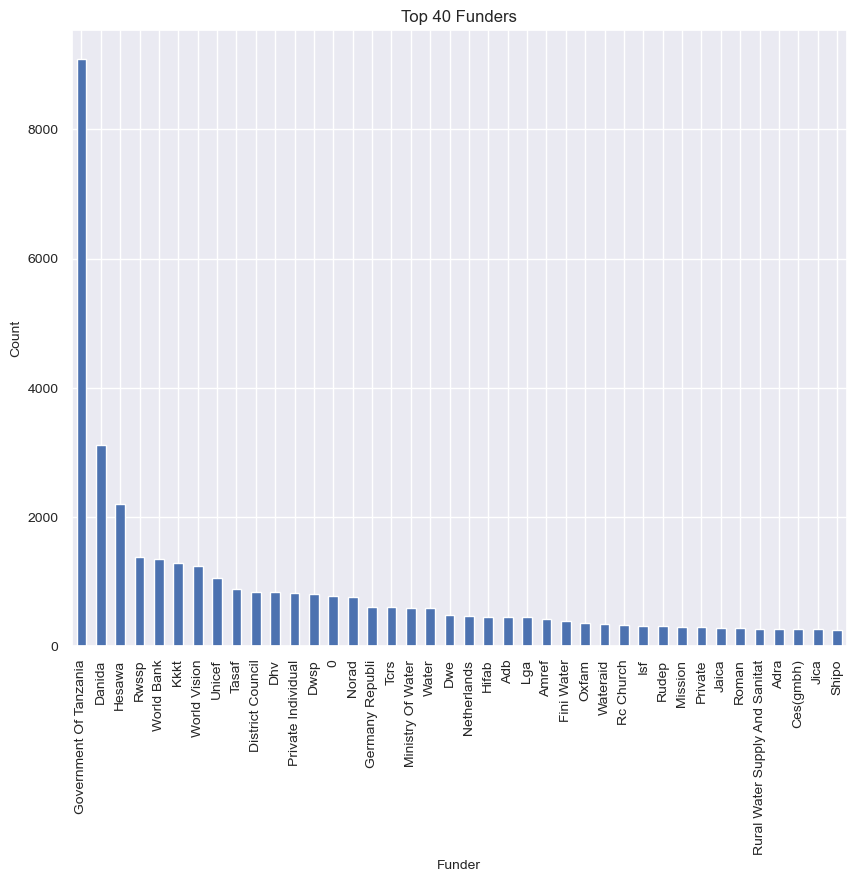

In [19]:
#Visualización gráfica
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la distribución de la columna 'funder'
funder_counts = train['funder'].value_counts()

# Graficar los valores más comunes
top_funders = funder_counts.head(40)  # Muestra los 40 funders más comunes

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_funders.plot(kind='bar')
plt.title('Top 40 Funders')
plt.xlabel('Funder')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [20]:
# Obtener la distribución de la columna 'funder'
funder_counts = train['funder'].value_counts()

# Filtrar los funders con frecuencia inferior a 30
funders_below_30 = funder_counts[funder_counts < 30]

# Mostrar los funders y sus frecuencias
print(funders_below_30)


funder
World Vision/adra       29
Il                      29
Finwater                29
Cocern                  29
Kidep                   29
                        ..
Muwasa                   1
Msigw                    1
Rc Mofu                  1
Overland High School     1
Samlo                    1
Name: count, Length: 1690, dtype: int64


In [21]:
# Obtener la distribución de la columna 'funder'
funder_counts = train['funder'].value_counts()

# Filtrar los funders con frecuencia inferior a 20
funders_below_20 = funder_counts[funder_counts < 20]

# Mostrar los funders y sus frecuencias
print(funders_below_20)

funder
P                           19
Peace Cope                  19
Kuamu                       19
Makonde Water Population    19
Water Board                 19
                            ..
Muwasa                       1
Msigw                        1
Rc Mofu                      1
Overland High School         1
Samlo                        1
Name: count, Length: 1627, dtype: int64


In [22]:
# Obtener la distribución de la columna 'funder'
funder_counts = train['funder'].value_counts()

# Filtrar los funders con frecuencia inferior a 10
funders_below_10 = funder_counts[funder_counts < 10]

# Mostrar los funders y sus frecuencias
print(funders_below_10)

funder
W.D & I.                9
Council                 9
Cobashec                9
Aimgold                 9
Tassaf Ii               9
                       ..
Muwasa                  1
Msigw                   1
Rc Mofu                 1
Overland High School    1
Samlo                   1
Name: count, Length: 1490, dtype: int64


Se observa una gran cantidad de categorias con valores muy pequeños.

In [24]:
#Valores null en funder
total_nulls = train['funder'].isnull().sum()

print(total_nulls)

3637


In [25]:
import pandas as pd
import numpy as np


# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = train['funder'].dropna().count()
proportions = train['funder'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = train['funder'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for funder, count in imputed_nulls.items():
    impute_values.extend([funder] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'funder'
null_indices = train['funder'][train['funder'].isnull()].index
train.loc[null_indices, 'funder'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(train['funder'].value_counts())



Total de valores nulos: 3637
Proporciones de cada categoría:
funder
Government Of Tanzania    0.162904
Danida                    0.055843
Hesawa                    0.039489
Rwssp                     0.024640
World Bank                0.024192
                            ...   
Muwasa                    0.000018
Msigw                     0.000018
Rc Mofu                   0.000018
Overland High School      0.000018
Samlo                     0.000018
Name: count, Length: 1896, dtype: float64
Cantidad imputada a cada categoría:
funder
Government Of Tanzania    716
Danida                    203
Hesawa                    144
Rwssp                      90
World Bank                 88
                         ... 
Muwasa                      0
Msigw                       0
Rc Mofu                     0
Overland High School        0
Samlo                       0
Name: count, Length: 1896, dtype: int32
Valores imputados:
funder
Government Of Tanzania    9800
Danida                    3317
Hesa

In [26]:
#Valores null tras su ajuste
train.isnull().sum()

id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

Para abordar la variable funder, el objetivo principal fue manejar los valores nulos sin perder un gran número de datos. Eliminar estas observaciones hubiera resultado en una pérdida significativa de información, lo cual no era deseable.

En lugar de eliminar las filas con valores nulos o imputar todos los valores nulos con la categoría más frecuente, lo que podría sesgar significativamente los datos, se optó por una estrategia más equilibrada:

Calcular las proporciones de cada categoría:
Primero, se calcularon las proporciones de cada categoría en la variable funder en función del total de observaciones no nulas. Esto permitió entender la distribución actual de las categorías.

Determinar la cantidad de valores nulos:
Luego, se determinó la cantidad total de valores nulos presentes en la variable funder.

Imputar valores nulos basado en las proporciones calculadas:
Se calculó cuántos valores nulos deberían asignarse a cada categoría en función de sus proporciones. Esto se hizo multiplicando las proporciones por el número total de valores nulos y redondeando los resultados.

Ajuste de la distribución:
Para asegurarse de que el total de valores imputados coincidiera exactamente con el número de valores nulos, se realizaron ajustes menores. Si había una discrepancia debido al redondeo, se ajustó el valor de la categoría más frecuente para compensar la diferencia.


**Durante el análisis de la variable categórica funder, se identificaron las siguientes características y preocupaciones:**

Gran número de categorías:
La variable funder contiene un total de 1896 categorías, lo cual es un número considerablemente alto. Un gran número de categorías puede complicar el análisis y la interpretación de los resultados, además de incrementar la dimensionalidad del problema.

Distribución desigual de frecuencias:
Al revisar las frecuencias de las diferentes categorías, se observa una gran disparidad. Por ejemplo, la categoría más común, "Government Of Tanzania", tiene 9084 observaciones, mientras que muchas otras categorías tienen frecuencias significativamente menores.
Categorías con frecuencia muy baja:
Se identificó que una gran cantidad de categorías tienen frecuencias muy bajas. Específicamente:

1690 categorías tienen una frecuencia menor a 30.
1614 categorías tienen una frecuencia menor a 20.
1464 categorías tienen una frecuencia menor a 10.
Por lo que se propone una agrupación de baja frecuencia con el siguiente fin.
Reducción de la Dimensionalidad, mejora de la Estabilidad del Modelo y significado Estadístico, ya que, las categorías con muy pocas observaciones no tienen un impacto significativo cuando se consideran individualmente. Sin embargo, al agruparlas, su impacto colectivo puede ser más significativo y útil para el análisis.

Este proceso será replicado con el resto de las variables que contienen valores nulos o faltantes. Cabe mencionar que en la variable scheme_name, algunas categorías consistían en nombres de una sola letra, como "K", y estas tenían una representación considerablemente alta en la frecuencia de dicha variable. Esto me llevó a cuestionar si este tipo de categorías de una sola letra eran correctas o si deberían ser redistribuidas de acuerdo con la frecuencia de otras categorías.

In [30]:
# Calcular las frecuencias de las categorías despues del ajuste
funder_counts = train['funder'].value_counts()

# Definir los tramos de frecuencia
rare_1_9 = funder_counts[funder_counts < 10].index
rare_10_49 = funder_counts[(funder_counts >= 10) & (funder_counts < 50)].index
rare_50_99 = funder_counts[(funder_counts >= 50) & (funder_counts < 100)].index

# Reemplazar las categorías según los tramos definidos
train['funder'] = train['funder'].apply(
    lambda x: 'Rare_1_9' if x in rare_1_9 else 
              ('Rare_10_49' if x in rare_10_49 else 
               ('Rare_50_99' if x in rare_50_99 else x))
)

# Mostrar los resultados
print(train['funder'].value_counts())


funder
Government Of Tanzania           9800
Rare_10_49                       6245
Rare_50_99                       3917
Danida                           3317
Rare_1_9                         2793
                                 ... 
Village Council                   112
Halmashauri Ya Wilaya Sikonge     109
Germany                           108
Hsw                               108
Twe                               103
Name: count, Length: 95, dtype: int64


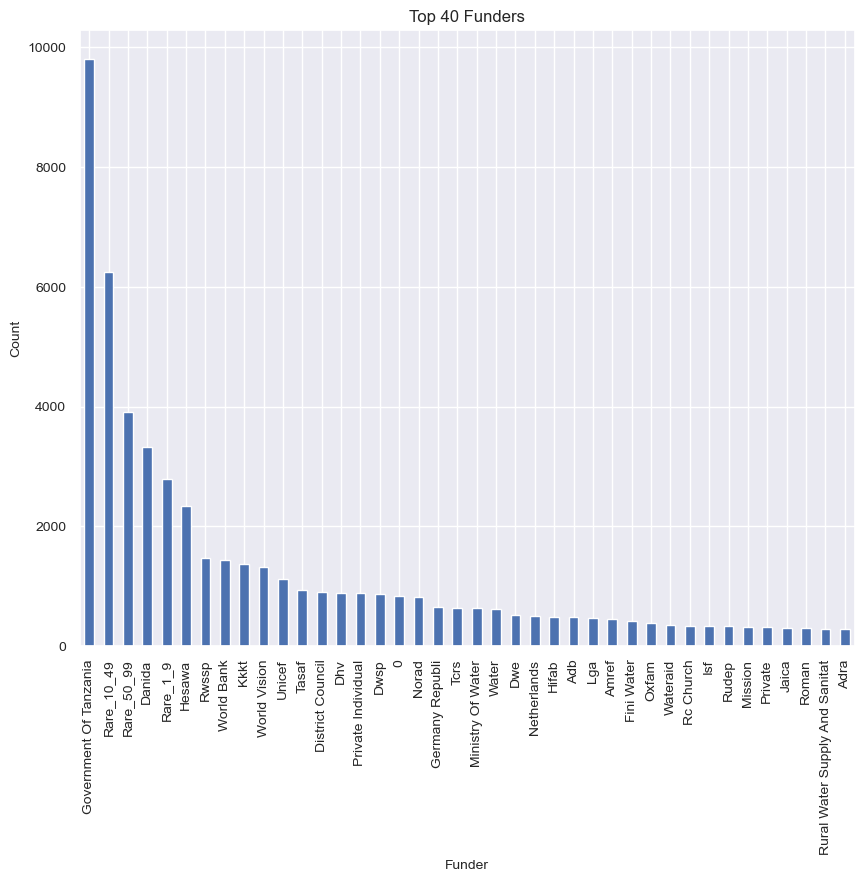

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la distribución de la columna 'funder'
funder_counts = train['funder'].value_counts()

# Graficar los valores más comunes
top_funders = funder_counts.head(40)  # Muestra los 40 funders más comunes

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_funders.plot(kind='bar')
plt.title('Top 40 Funders')
plt.xlabel('Funder')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [32]:
installer_counts = train['installer'].value_counts()

print(installer_counts)

installer
DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: count, Length: 2145, dtype: int64


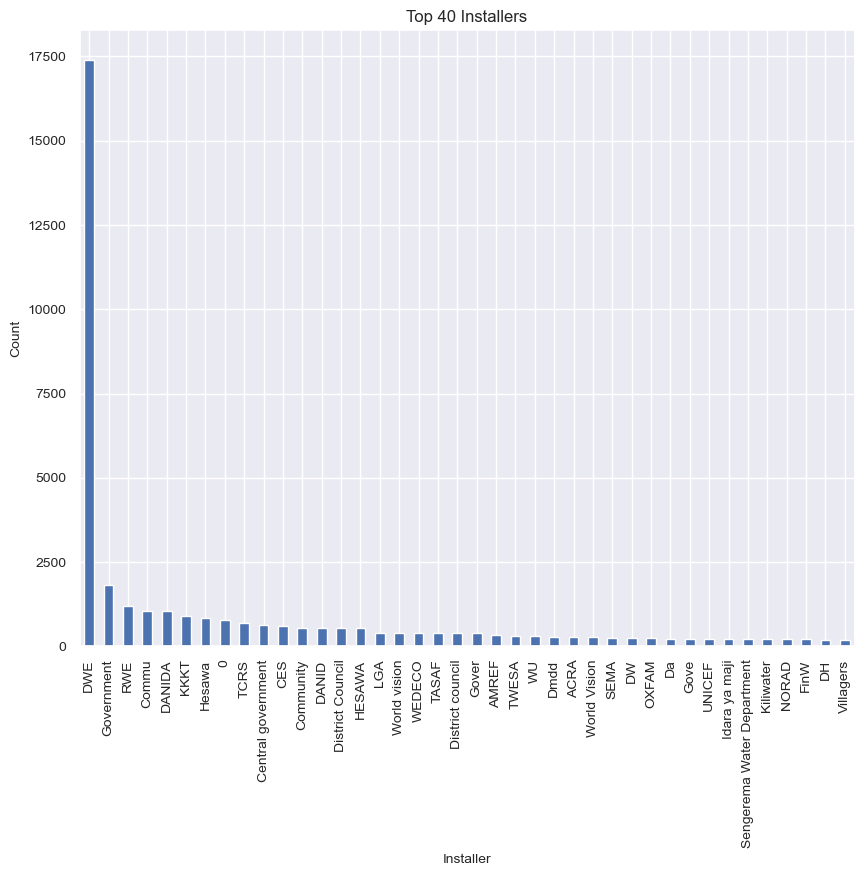

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la distribución de la columna 'installer'
installer_counts = train['installer'].value_counts()

# Graficar los valores más comunes
top_installers = installer_counts.head(40)  # Muestra los 40 installers más comunes

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_installers.plot(kind='bar')
plt.title('Top 40 Installers')
plt.xlabel('Installer')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [34]:
# Obtener la distribución de la columna 'installer'
installer_counts = train['installer'].value_counts()

# Filtrar los installers con frecuencia inferior a 30
installers_below_30 = installer_counts[installer_counts < 30]

# Mostrar los installers y sus frecuencias
print(installers_below_30)

installer
CCEC               29
ABASIA             29
Po                 29
PADEP              29
FinWater           29
                   ..
Wizara  ya maji     1
TWESS               1
Nasan workers       1
R                   1
SELEPTA             1
Name: count, Length: 1950, dtype: int64


In [35]:
# Obtener la distribución de la columna 'installer'
installer_counts = train['installer'].value_counts()

# Filtrar los installers con frecuencia inferior a 20
installers_below_20 = installer_counts[installer_counts < 20]

# Mostrar los installers y sus frecuencias
print(installers_below_20)

installer
Kuamu                   19
KIM KIM CONSTRUCTION    19
CG                      19
private                 19
SOWASA                  19
                        ..
Wizara  ya maji          1
TWESS                    1
Nasan workers            1
R                        1
SELEPTA                  1
Name: count, Length: 1876, dtype: int64


In [36]:
# Obtener la distribución de la columna 'installer'
installer_counts = train['installer'].value_counts()

# Filtrar los installers con frecuencia inferior a 10
installers_below_10 = installer_counts[installer_counts < 10]

# Mostrar los installers y sus frecuencias
print(installers_below_10)

installer
VILLAGERS          9
Healt              9
RUDEP              9
ACTIVE TANK CO     9
IDARA              9
                  ..
Wizara  ya maji    1
TWESS              1
Nasan workers      1
R                  1
SELEPTA            1
Name: count, Length: 1722, dtype: int64


In [37]:
# Obtener la distribución de la columna 'installer'
installer_counts = train['installer'].value_counts()

# Filtrar los installers con frecuencia inferior a 5
installers_below_5 = installer_counts[installer_counts < 5]

# Mostrar los installers y sus frecuencias
print(installers_below_5)

installer
Roman Ca           4
TGTS               4
Concen             4
TUMAINI FUND       4
JLH CO LTD         4
                  ..
Wizara  ya maji    1
TWESS              1
Nasan workers      1
R                  1
SELEPTA            1
Name: count, Length: 1526, dtype: int64


In [38]:
total_nulls_installer = train['installer'].isnull().sum()

print(total_nulls_installer)

3655


In [39]:
# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = train['installer'].dropna().count()
proportions = train['installer'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = train['installer'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for installer, count in imputed_nulls.items():
    impute_values.extend([installer] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'installer'
null_indices = train['installer'][train['installer'].isnull()].index
train.loc[null_indices, 'installer'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(train['installer'].value_counts())


Total de valores nulos: 3655
Proporciones de cada categoría:
installer
DWE                0.312171
Government         0.032738
RWE                0.021634
Commu              0.019015
DANIDA             0.018836
                     ...   
Wizara  ya maji    0.000018
TWESS              0.000018
Nasan workers      0.000018
R                  0.000018
SELEPTA            0.000018
Name: count, Length: 2145, dtype: float64
Cantidad imputada a cada categoría:
installer
DWE                1292
Government          120
RWE                  79
Commu                70
DANIDA               69
                   ... 
Wizara  ya maji       0
TWESS                 0
Nasan workers         0
R                     0
SELEPTA               0
Name: count, Length: 2145, dtype: int32
Valores imputados:
installer
DWE                18694
Government          1945
RWE                 1285
Commu               1130
DANIDA              1119
                   ...  
Wizara  ya maji        1
TWESS                  1


In [40]:
train.isnull().sum()

id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [41]:
# Calcular las frecuencias de las categorías
installer_counts = train['installer'].value_counts()

# Definir los tramos de frecuencia
rare_menor_5 = installer_counts[installer_counts < 5].index
rare_5_20 = installer_counts[(installer_counts >= 5) & (installer_counts <= 20)].index
rare_menor_50_mayor_20 = installer_counts[(installer_counts > 20) & (installer_counts < 50)].index
rare_50_100 = installer_counts[(installer_counts >= 50) & (installer_counts <= 100)].index
rare_101_150 = installer_counts[(installer_counts > 100) & (installer_counts <= 150)].index
rare_151_200 = installer_counts[(installer_counts > 150) & (installer_counts <= 200)].index
rare_201_500 = installer_counts[(installer_counts > 200) & (installer_counts <= 500)].index

# Reemplazar las categorías según los tramos definidos
train['installer'] = train['installer'].apply(
    lambda x: 'Rare_menor_5' if x in rare_menor_5 else 
              ('Rare_5_20' if x in rare_5_20 else 
               ('Rare_menor_50_mayor_20' if x in rare_menor_50_mayor_20 else 
                ('Rare_50_100' if x in rare_50_100 else 
                 ('Rare_101_150' if x in rare_101_150 else 
                  ('Rare_151_200' if x in rare_151_200 else 
                   ('Rare_201_500' if x in rare_201_500 else x))))))
)

# Mostrar los resultados
print(train['installer'].value_counts())



installer
DWE                       18694
Rare_201_500               7694
Rare_50_100                4107
Rare_101_150               3892
Rare_menor_50_mayor_20     3732
Rare_5_20                  3568
Rare_151_200               2895
Rare_menor_5               2255
Government                 1945
RWE                        1285
Commu                      1130
DANIDA                     1119
KKKT                        957
Hesawa                      895
0                           828
TCRS                        753
Central government          663
CES                         650
Community                   589
DANID                       588
District Council            587
HESAWA                      574
Name: count, dtype: int64


In [42]:
installer_counts_subvillage = train['subvillage'].value_counts()

print(installer_counts_subvillage)

subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64


In [43]:
total_nulls_subvillage = train['subvillage'].isnull().sum()

print(total_nulls_subvillage)

371


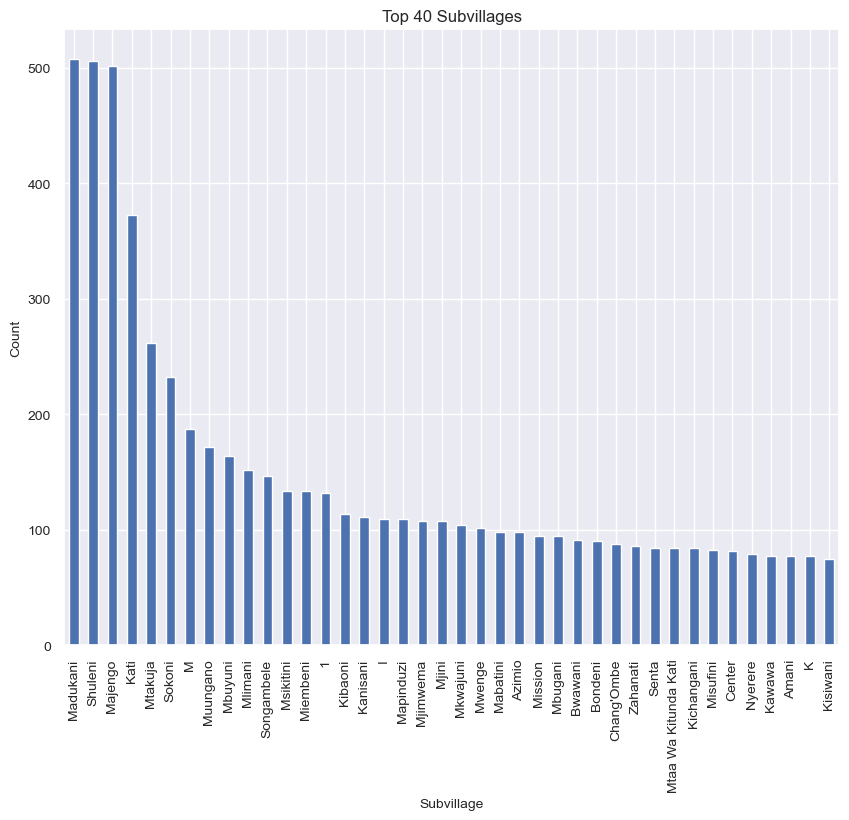

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la distribución de la columna 'subvillage'
subvillage_counts = train['subvillage'].value_counts()

# Graficar los valores más comunes
top_subvillages = subvillage_counts.head(40)  # Muestra los 40 subvillages más comunes

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_subvillages.plot(kind='bar')
plt.title('Top 40 Subvillages')
plt.xlabel('Subvillage')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [45]:
# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = train['subvillage'].dropna().count()
proportions = train['subvillage'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = train['subvillage'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for subvillage, count in imputed_nulls.items():
    impute_values.extend([subvillage] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'subvillage'
null_indices = train['subvillage'][train['subvillage'].isnull()].index
train.loc[null_indices, 'subvillage'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(train['subvillage'].value_counts())


Total de valores nulos: 371
Proporciones de cada categoría:
subvillage
Madukani        0.008606
Shuleni         0.008572
Majengo         0.008504
Kati            0.006319
Mtakuja         0.004438
                  ...   
Kipompo         0.000017
Chanyamilima    0.000017
Ikalime         0.000017
Kemagaka        0.000017
Kikatanyemba    0.000017
Name: count, Length: 19287, dtype: float64
Cantidad imputada a cada categoría:
subvillage
Madukani        331
Shuleni           3
Majengo           3
Kati              2
Mtakuja           2
               ... 
Kipompo           0
Chanyamilima      0
Ikalime           0
Kemagaka          0
Kikatanyemba      0
Name: count, Length: 19287, dtype: int32
Valores imputados:
subvillage
Madukani        839
Shuleni         509
Majengo         505
Kati            375
Mtakuja         264
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64


In [46]:
# Obtener la distribución de la columna 'installer'
subvillage_counts = train['subvillage'].value_counts()

# Filtrar los installers con frecuencia inferior a 30
subvillage_below_30 = subvillage_counts[subvillage_counts < 30]

# Mostrar los installers y sus frecuencias
print(subvillage_below_30)

subvillage
Kivukoni        29
Stesheni        29
Mandela         29
Lusungo         29
Uhuru           28
                ..
Kipompo          1
Chanyamilima     1
Ikalime          1
Kemagaka         1
Kikatanyemba     1
Name: count, Length: 19162, dtype: int64


In [47]:
# Obtener la distribución de la columna 'installer'
subvillage_counts = train['subvillage'].value_counts()

# Filtrar los installers con frecuencia inferior a 10
subvillage_below_10 = subvillage_counts[subvillage_counts < 10]

# Mostrar los installers y sus frecuencias
print(subvillage_below_10)

subvillage
Kinyika         9
Nselembwe       9
Isupilo         9
Kinjumbi A      9
Lusungu         9
               ..
Kipompo         1
Chanyamilima    1
Ikalime         1
Kemagaka        1
Kikatanyemba    1
Name: count, Length: 18560, dtype: int64


In [48]:
# Obtener la distribución de la columna 'installer'
subvillage_counts = train['subvillage'].value_counts()

# Filtrar los installers con frecuencia inferior a 5
subvillage_below_5 = subvillage_counts[subvillage_counts < 5]

# Mostrar los installers y sus frecuencias
print(subvillage_below_5)

subvillage
Mlati           4
Zizini          4
Nyarukaza       4
Leshaku         4
Ngongowele      4
               ..
Kipompo         1
Chanyamilima    1
Ikalime         1
Kemagaka        1
Kikatanyemba    1
Name: count, Length: 16569, dtype: int64


In [49]:
# Obtener la distribución de la columna 'installer'
subvillage_counts = train['subvillage'].value_counts()

# Filtrar los installers con frecuencia igual a 1
subvillage_below_1 = subvillage_counts[subvillage_counts == 1]

# Mostrar los installers y sus frecuencias
print(subvillage_below_1)

subvillage
Kahalawe        1
Hevizumbo       1
Hudighadi       1
Sekond          1
Mininga         1
               ..
Kipompo         1
Chanyamilima    1
Ikalime         1
Kemagaka        1
Kikatanyemba    1
Name: count, Length: 9424, dtype: int64


In [50]:
# Definir los tramos de frecuencia
rare_1 = subvillage_counts[subvillage_counts == 1].index
rare_2_4 = subvillage_counts[(subvillage_counts > 1) & (subvillage_counts < 5)].index
rare_5_10 = subvillage_counts[(subvillage_counts >= 5) & (subvillage_counts <= 10)].index
rare_11_20 = subvillage_counts[(subvillage_counts >= 11) & (subvillage_counts <= 20)].index
rare_21_50 = subvillage_counts[(subvillage_counts >= 21) & (subvillage_counts <= 50)].index
rare_51_100 = subvillage_counts[(subvillage_counts >= 51) & (subvillage_counts <= 100)].index
rare_101_plus = subvillage_counts[subvillage_counts > 100].index

# Reemplazar las categorías según los tramos definidos
train['subvillage'] = train['subvillage'].apply(
    lambda x: 'Rare_1' if x in rare_1 else 
              ('Rare_2_4' if x in rare_2_4 else 
               ('Rare_5_10' if x in rare_5_10 else 
                ('Rare_11_20' if x in rare_11_20 else 
                 ('Rare_21_50' if x in rare_21_50 else 
                  ('Rare_51_100' if x in rare_51_100 else 
                   ('Rare_101_plus' if x in rare_101_plus else x))))))
)

# Mostrar los resultados
print(train['subvillage'].value_counts())

subvillage
Rare_2_4         18809
Rare_5_10        13758
Rare_1            9424
Rare_11_20        5533
Rare_101_plus     4828
Rare_21_50        4345
Rare_51_100       2703
Name: count, dtype: int64


In [51]:
train.isnull().sum()

id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [52]:
wpt_name_counts = train['wpt_name'].value_counts()

print(wpt_name_counts)

wpt_name
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: count, Length: 37399, dtype: int64


In [53]:
import pandas as pd

# Filtrar las categorías con nombres de longitud menor o igual a 2
short_names = wpt_name_counts[wpt_name_counts.index.str.len() < 2]

# Mostrar el resultado
print(short_names)
print(f'Número de categorías con nombres de longitud <= 2: {len(short_names)}')


wpt_name
M    3
X    1
K    1
R    1
B    1
S    1
G    1
Name: count, dtype: int64
Número de categorías con nombres de longitud <= 2: 7


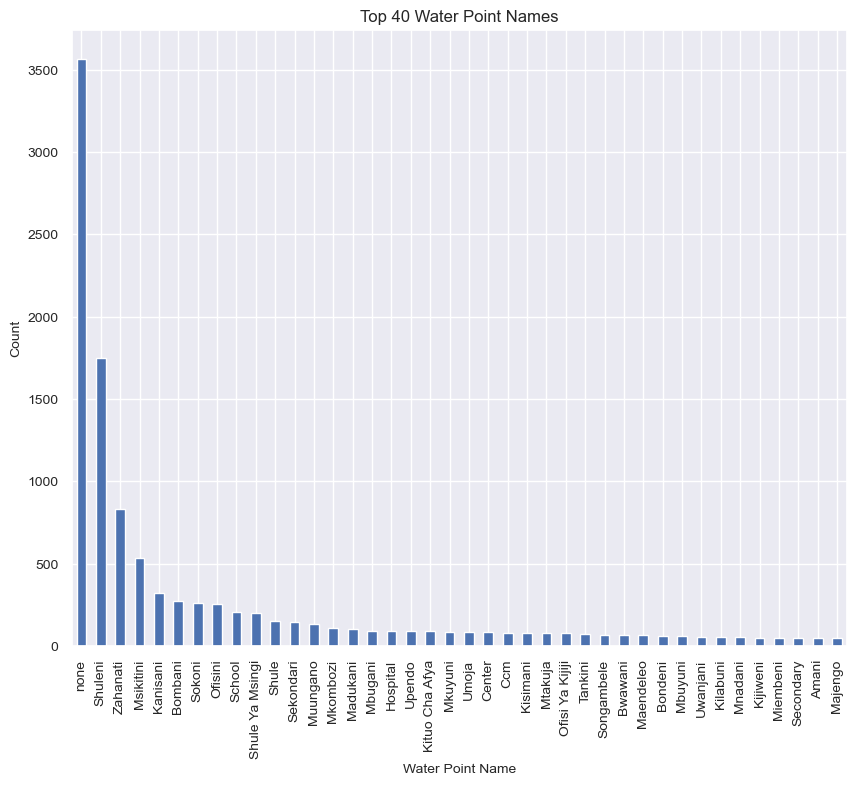

In [54]:
import matplotlib.pyplot as plt

# Obtener la distribución de la columna 'wpt_name'
wpt_name_counts = train['wpt_name'].value_counts()

# Graficar los valores más comunes
top_wpt_names = wpt_name_counts.head(40)  # Muestra los 40 nombres de puntos de agua más comunes

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_wpt_names.plot(kind='bar')
plt.title('Top 40 Water Point Names')
plt.xlabel('Water Point Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [55]:
# Paso 1: Convertir "none" a NaN
train['wpt_name'] = train['wpt_name'].replace('none', np.nan)

# Paso 2: Contar valores nulos
total_nulls = train['wpt_name'].isnull().sum()
print(total_nulls)

3565


In [56]:
# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = train['wpt_name'].dropna().count()
proportions = train['wpt_name'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = train['wpt_name'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for wpt_name, count in imputed_nulls.items():
    impute_values.extend([wpt_name] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'wpt_name'
null_indices = train['wpt_name'][train['wpt_name'].isnull()].index
train.loc[null_indices, 'wpt_name'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(train['wpt_name'].value_counts())


Total de valores nulos: 3565
Proporciones de cada categoría:
wpt_name
Shuleni                    0.031307
Zahanati                   0.014865
Msikitini                  0.009582
Kanisani                   0.005785
Bombani                    0.004854
                             ...   
Kwa Medadi                 0.000018
Kwa Kubembeni              0.000018
Shule Ya Msingi Milanzi    0.000018
Funua                      0.000018
Kwa Mzee Lugawa            0.000018
Name: count, Length: 37398, dtype: float64
Cantidad imputada a cada categoría:
wpt_name
Shuleni                    2851
Zahanati                     53
Msikitini                    34
Kanisani                     21
Bombani                      17
                           ... 
Kwa Medadi                    0
Kwa Kubembeni                 0
Shule Ya Msingi Milanzi       0
Funua                         0
Kwa Mzee Lugawa               0
Name: count, Length: 37398, dtype: int32
Valores imputados:
wpt_name
Shuleni                  

In [57]:
# Obtener la distribución de la columna 'wpt_name_'
wpt_name_counts = train['wpt_name'].value_counts()

# Filtrar los wpt_name_ con frecuencia inferior a 30
wpt_name_below_30 = wpt_name_counts[wpt_name_counts < 30]

# Mostrar los wpt_name_ y sus frecuencias
print(wpt_name_below_30)


wpt_name
Kwa Samweli                29
Lutheran Church            29
Machinjioni                28
Migombani                  28
Godown                     28
                           ..
Kwa Medadi                  1
Kwa Kubembeni               1
Shule Ya Msingi Milanzi     1
Funua                       1
Kwa Mzee Lugawa             1
Name: count, Length: 37324, dtype: int64


In [58]:
# Obtener la distribución de la columna 'wpt_name_'
wpt_name_counts = train['wpt_name'].value_counts()

# Filtrar los wpt_name_ con frecuencia igual a 1
wpt_name_below_1 = wpt_name_counts[wpt_name_counts == 1]

# Mostrar los wpt_name_ y sus frecuencias
print(wpt_name_below_1)


wpt_name
Binti Selemani             1
Mwambenene                 1
Kwa Stephano Mbao          1
Kwa Mzee Likalangi         1
Kashanga                   1
                          ..
Kwa Medadi                 1
Kwa Kubembeni              1
Shule Ya Msingi Milanzi    1
Funua                      1
Kwa Mzee Lugawa            1
Name: count, Length: 32928, dtype: int64


In [59]:
# Obtener la distribución de la columna 'wpt_name'
wpt_name_counts = train['wpt_name'].value_counts()

# Definir los tramos de frecuencia
rare_1 = wpt_name_counts[wpt_name_counts == 1].index
rare_2_30 = wpt_name_counts[(wpt_name_counts > 1) & (wpt_name_counts <= 30)].index
rare_31_100 = wpt_name_counts[(wpt_name_counts > 30) & (wpt_name_counts <= 100)].index
rare_101_500 = wpt_name_counts[(wpt_name_counts > 100) & (wpt_name_counts <= 500)].index

# Reemplazar las categorías según los tramos definidos
train['wpt_name'] = train['wpt_name'].apply(
    lambda x: 'Rare_1' if x in rare_1 else
              ('Rare_2_30' if x in rare_2_30 else
               ('Rare_31_100' if x in rare_31_100 else
                ('Rare_101_500' if x in rare_101_500 else x))
    )
)

# Mostrar los resultados
print(train['wpt_name'].value_counts())



wpt_name
Rare_1          32928
Rare_2_30       14968
Shuleni          4599
Rare_31_100      3154
Rare_101_500     2299
Zahanati          883
Msikitini         569
Name: count, dtype: int64


In [60]:
train.isnull().sum()

id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [61]:
public_meeting_counts = train['public_meeting'].value_counts()

print(public_meeting_counts)

public_meeting
True     51011
False     5055
Name: count, dtype: int64


In [62]:
# Obtener la distribución de la columna 'public_meeting'
public_meeting_counts = train['public_meeting'].value_counts()

# Crear una copia para evitar modificar los datos originales
public_meeting_counts_modified = public_meeting_counts.copy()

# Reemplazar True por 1 y False por 0 en la copia
public_meeting_counts_modified.index = public_meeting_counts_modified.index.map({True: 1, False: 0}.get)

# Mostrar los resultados
print(public_meeting_counts_modified)


public_meeting
1    51011
0     5055
Name: count, dtype: int64


In [63]:
# Contar valores nulos
total_nulls_public_meeting = train['public_meeting'].isnull().sum()
print(total_nulls_public_meeting)

3334


In [64]:
# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = train['public_meeting'].dropna().count()
proportions = train['public_meeting'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = train['public_meeting'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for public_meeting, count in imputed_nulls.items():
    impute_values.extend([public_meeting] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'public_meeting'
null_indices = train['public_meeting'][train['public_meeting'].isnull()].index
train.loc[null_indices, 'public_meeting'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(train['public_meeting'].value_counts())


Total de valores nulos: 3334
Proporciones de cada categoría:
public_meeting
True     0.909838
False    0.090162
Name: count, dtype: float64
Cantidad imputada a cada categoría:
public_meeting
True     3033
False     301
Name: count, dtype: int32
Valores imputados:
public_meeting
True     54044
False     5356
Name: count, dtype: int64


In [65]:
train.isnull().sum()

id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [66]:
scheme_management_counts = train['scheme_management'].value_counts()

print(scheme_management_counts)

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64


In [67]:
import numpy as np

# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = train['scheme_management'].dropna().count()
proportions = train['scheme_management'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = train['scheme_management'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for scheme_management, count in imputed_nulls.items():
    impute_values.extend([scheme_management] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'scheme_management'
null_indices = train['scheme_management'][train['scheme_management'].isnull()].index
train.loc[null_indices, 'scheme_management'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(train['scheme_management'].value_counts())


Total de valores nulos: 3878
Proporciones de cada categoría:
scheme_management
VWC                 0.662674
WUG                 0.093765
Water authority     0.056788
WUA                 0.051925
Water Board         0.049494
Parastatal          0.030258
Private operator    0.019146
Company             0.019110
Other               0.013796
SWC                 0.001747
Trust               0.001297
Name: count, dtype: float64
Cantidad imputada a cada categoría:
scheme_management
VWC                 2570
WUG                  364
Water authority      220
WUA                  201
Water Board          192
Parastatal           117
Private operator      74
Company               74
Other                 54
SWC                    7
Trust                  5
Name: count, dtype: int32
Valores imputados:
scheme_management
VWC                 39363
WUG                  5570
Water authority      3373
WUA                  3084
Water Board          2940
Parastatal           1797
Private operator     1137


In [68]:
train.isnull().sum()

id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [69]:
scheme_name_counts = train['scheme_name'].value_counts()

print(scheme_name_counts)

scheme_name
K                       682
Borehole                546
Chalinze wate           405
M                       400
DANIDA                  379
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: count, Length: 2695, dtype: int64


In [70]:
# Filtrar las categorías con nombres de longitud menor o igual a 2
short_names = scheme_name_counts[scheme_name_counts.index.str.len() < 2]

# Mostrar el resultado
print(short_names)
print(f'Número de categorías con nombres de longitud <= 2: {len(short_names)}')

scheme_name
K    682
M    400
I    229
N    204
S    154
D     78
G     71
J     59
U     58
A     42
W     39
B     37
T     17
L     16
P     12
E      7
O      6
k      3
C      2
V      2
v      1
Name: count, dtype: int64
Número de categorías con nombres de longitud <= 2: 21


In [71]:
# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = train['scheme_name'].dropna().count()
proportions = train['scheme_name'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = train['scheme_name'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for scheme_name, count in imputed_nulls.items():
    impute_values.extend([scheme_name] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'scheme_name'
null_indices = train['scheme_name'][train['scheme_name'].isnull()].index
train.loc[null_indices, 'scheme_name'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(train['scheme_name'].value_counts())

Total de valores nulos: 28810
Proporciones de cada categoría:
scheme_name
K                       0.022295
Borehole                0.017849
Chalinze wate           0.013240
M                       0.013076
DANIDA                  0.012390
                          ...   
Mradi wa maji Vijini    0.000033
Villagers               0.000033
Magundi water supply    0.000033
Saadani Chumv           0.000033
Mtawanya                0.000033
Name: count, Length: 2695, dtype: float64
Cantidad imputada a cada categoría:
scheme_name
K                       642
Borehole                514
Chalinze wate           381
M                       377
DANIDA                  357
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: count, Length: 2695, dtype: int32
Valores imputados:
scheme_name
K                       1324
Borehole                1060
Chalinze wate            786
M      

In [72]:
# Obtener la distribución de la columna 'scheme_name'
scheme_name_counts = train['scheme_name'].value_counts()

# Filtrar los scheme_name con frecuencia igual a 1
scheme_name_below_1 = scheme_name_counts[scheme_name_counts < 3]

# Mostrar los scheme_name y sus frecuencias
print(scheme_name_below_1)


scheme_name
River                     2
TM part Two               2
Forforo water supply      2
Maga                      2
Mkabenga spring source    2
                         ..
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: count, Length: 712, dtype: int64


In [73]:
# Obtener la distribución de la columna 'scheme_name'
scheme_name_counts = train['scheme_name'].value_counts()

# Filtrar los scheme_name con frecuencia igual a 1
scheme_name_below_1 = scheme_name_counts[scheme_name_counts < 7]

# Mostrar los scheme_name y sus frecuencias
print(scheme_name_below_1)

scheme_name
Mrufiti                        6
Mkutimango water supply        6
BL Lang'ata                    6
Mangu windmill piped scheme    6
Kampogonyo water               6
                              ..
Mradi wa maji Vijini           1
Villagers                      1
Magundi water supply           1
Saadani Chumv                  1
Mtawanya                       1
Name: count, Length: 1191, dtype: int64


In [74]:
# Obtener la distribución de la columna 'scheme_name'
scheme_name_counts = train['scheme_name'].value_counts()

# Filtrar los scheme_name con frecuencia igual a 1
scheme_name_below_1 = scheme_name_counts[scheme_name_counts < 20]

# Mostrar los scheme_name y sus frecuencias
print(scheme_name_below_1)

scheme_name
Mradi wa maji Nyanduga    19
Kiny                      19
Msirwa pipeline           19
Songota pipe line         19
Lupe                      19
                          ..
Mradi wa maji Vijini       1
Villagers                  1
Magundi water supply       1
Saadani Chumv              1
Mtawanya                   1
Name: count, Length: 1964, dtype: int64


In [75]:
# Obtener la distribución de la columna 'scheme_name'
scheme_name_counts = train['scheme_name'].value_counts()

# Definir los tramos de frecuencia
rare_less_3 = scheme_name_counts[scheme_name_counts < 3].index
rare_3_7 = scheme_name_counts[(scheme_name_counts >= 3) & (scheme_name_counts <= 7)].index
rare_8_12 = scheme_name_counts[(scheme_name_counts >= 8) & (scheme_name_counts <= 12)].index
rare_13_16 = scheme_name_counts[(scheme_name_counts >= 13) & (scheme_name_counts <= 16)].index
rare_17_20 = scheme_name_counts[(scheme_name_counts >= 17) & (scheme_name_counts <= 20)].index
rare_21_25 = scheme_name_counts[(scheme_name_counts >= 21) & (scheme_name_counts <= 25)].index
rare_26_30 = scheme_name_counts[(scheme_name_counts >= 26) & (scheme_name_counts <= 30)].index
rare_31_35 = scheme_name_counts[(scheme_name_counts >= 31) & (scheme_name_counts <= 35)].index
rare_36_40 = scheme_name_counts[(scheme_name_counts >= 36) & (scheme_name_counts <= 40)].index
rare_41_45 = scheme_name_counts[(scheme_name_counts >= 41) & (scheme_name_counts <= 45)].index
rare_46_50 = scheme_name_counts[(scheme_name_counts >= 46) & (scheme_name_counts <= 50)].index
rare_51_55 = scheme_name_counts[(scheme_name_counts >= 51) & (scheme_name_counts <= 55)].index
rare_56_64 = scheme_name_counts[(scheme_name_counts >= 56) & (scheme_name_counts <= 64)].index
rare_65_70 = scheme_name_counts[(scheme_name_counts >= 65) & (scheme_name_counts <= 70)].index
rare_71_80 = scheme_name_counts[(scheme_name_counts >= 71) & (scheme_name_counts <= 80)].index
rare_81_90 = scheme_name_counts[(scheme_name_counts >= 81) & (scheme_name_counts <= 90)].index
rare_91_100 = scheme_name_counts[(scheme_name_counts >= 91) & (scheme_name_counts <= 100)].index
rare_101_120 = scheme_name_counts[(scheme_name_counts >= 101) & (scheme_name_counts <= 120)].index
rare_121_140 = scheme_name_counts[(scheme_name_counts >= 121) & (scheme_name_counts <= 140)].index
rare_141_160 = scheme_name_counts[(scheme_name_counts >= 141) & (scheme_name_counts <= 160)].index
rare_161_180 = scheme_name_counts[(scheme_name_counts >= 161) & (scheme_name_counts <= 180)].index
rare_181_200 = scheme_name_counts[(scheme_name_counts >= 181) & (scheme_name_counts <= 200)].index

# Reemplazar las categorías según los tramos definidos
train['scheme_name'] = train['scheme_name'].apply(lambda x: 
    'Rare_less_3' if x in rare_less_3 else
    'Rare_3_7' if x in rare_3_7 else
    'Rare_8_12' if x in rare_8_12 else
    'Rare_13_16' if x in rare_13_16 else
    'Rare_17_20' if x in rare_17_20 else
    'Rare_21_25' if x in rare_21_25 else
    'Rare_26_30' if x in rare_26_30 else
    'Rare_31_35' if x in rare_31_35 else
    'Rare_36_40' if x in rare_36_40 else
    'Rare_41_45' if x in rare_41_45 else
    'Rare_46_50' if x in rare_46_50 else
    'Rare_51_55' if x in rare_51_55 else
    'Rare_56_64' if x in rare_56_64 else
    'Rare_65_70' if x in rare_65_70 else
    'Rare_71_80' if x in rare_71_80 else
    'Rare_81_90' if x in rare_81_90 else
    'Rare_91_100' if x in rare_91_100 else
    'Rare_101_120' if x in rare_101_120 else
    'Rare_121_140' if x in rare_121_140 else
    'Rare_141_160' if x in rare_141_160 else
    'Rare_161_180' if x in rare_161_180 else
    'Rare_181_200' if x in rare_181_200 else
    x
)

# Mostrar los resultados
print(train['scheme_name'].value_counts())


scheme_name
Rare_8_12                                4346
Rare_21_25                               3915
Rare_31_35                               3315
Rare_13_16                               2872
Rare_56_64                               2804
Rare_101_120                             2556
Rare_17_20                               2482
Rare_46_50                               2476
Rare_26_30                               2408
Rare_41_45                               2389
Rare_3_7                                 2268
Rare_81_90                               1959
Rare_91_100                              1807
Rare_71_80                               1676
Rare_36_40                               1596
Rare_161_180                             1366
Rare_65_70                               1360
Rare_141_160                             1334
K                                        1324
Rare_less_3                              1212
Rare_121_140                             1174
Borehole              

In [76]:
train.isnull().sum()

id                          0
amount_tsh                  0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                  0
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting              0
recorded_by                 0
scheme_management           0
scheme_name                 0
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_g

In [77]:
permit_counts = train['permit'].value_counts()

print(permit_counts)

permit
True     38852
False    17492
Name: count, dtype: int64


In [78]:
# Obtener la distribución de la columna 'public_meeting'
permit_counts = train['permit'].value_counts()

# Crear una copia para evitar modificar los datos originales
permit_counts_modified = permit_counts.copy()

# Reemplazar True por 1 y False por 0 en la copia
permit_counts_modified.index = permit_counts_modified.index.map({True: 1, False: 0}.get)

# Mostrar los resultados
print(permit_counts_modified)

permit
1    38852
0    17492
Name: count, dtype: int64


In [79]:
# Contar valores nulos
total_nulls_permit = train['permit'].isnull().sum()
print(total_nulls_permit)

3056


In [80]:
# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = train['permit'].dropna().count()
proportions = train['permit'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = train['permit'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for permit, count in imputed_nulls.items():
    impute_values.extend([permit] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'permit'
null_indices = train['permit'][train['permit'].isnull()].index
train.loc[null_indices, 'permit'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(train['permit'].value_counts())

Total de valores nulos: 3056
Proporciones de cada categoría:
permit
True     0.68955
False    0.31045
Name: count, dtype: float64
Cantidad imputada a cada categoría:
permit
True     2107
False     949
Name: count, dtype: int32
Valores imputados:
permit
True     40959
False    18441
Name: count, dtype: int64


In [81]:
train.isnull().sum()

id                       0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [82]:
amount_tsh_counts = train['amount_tsh'].value_counts()

print(amount_tsh_counts)

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64


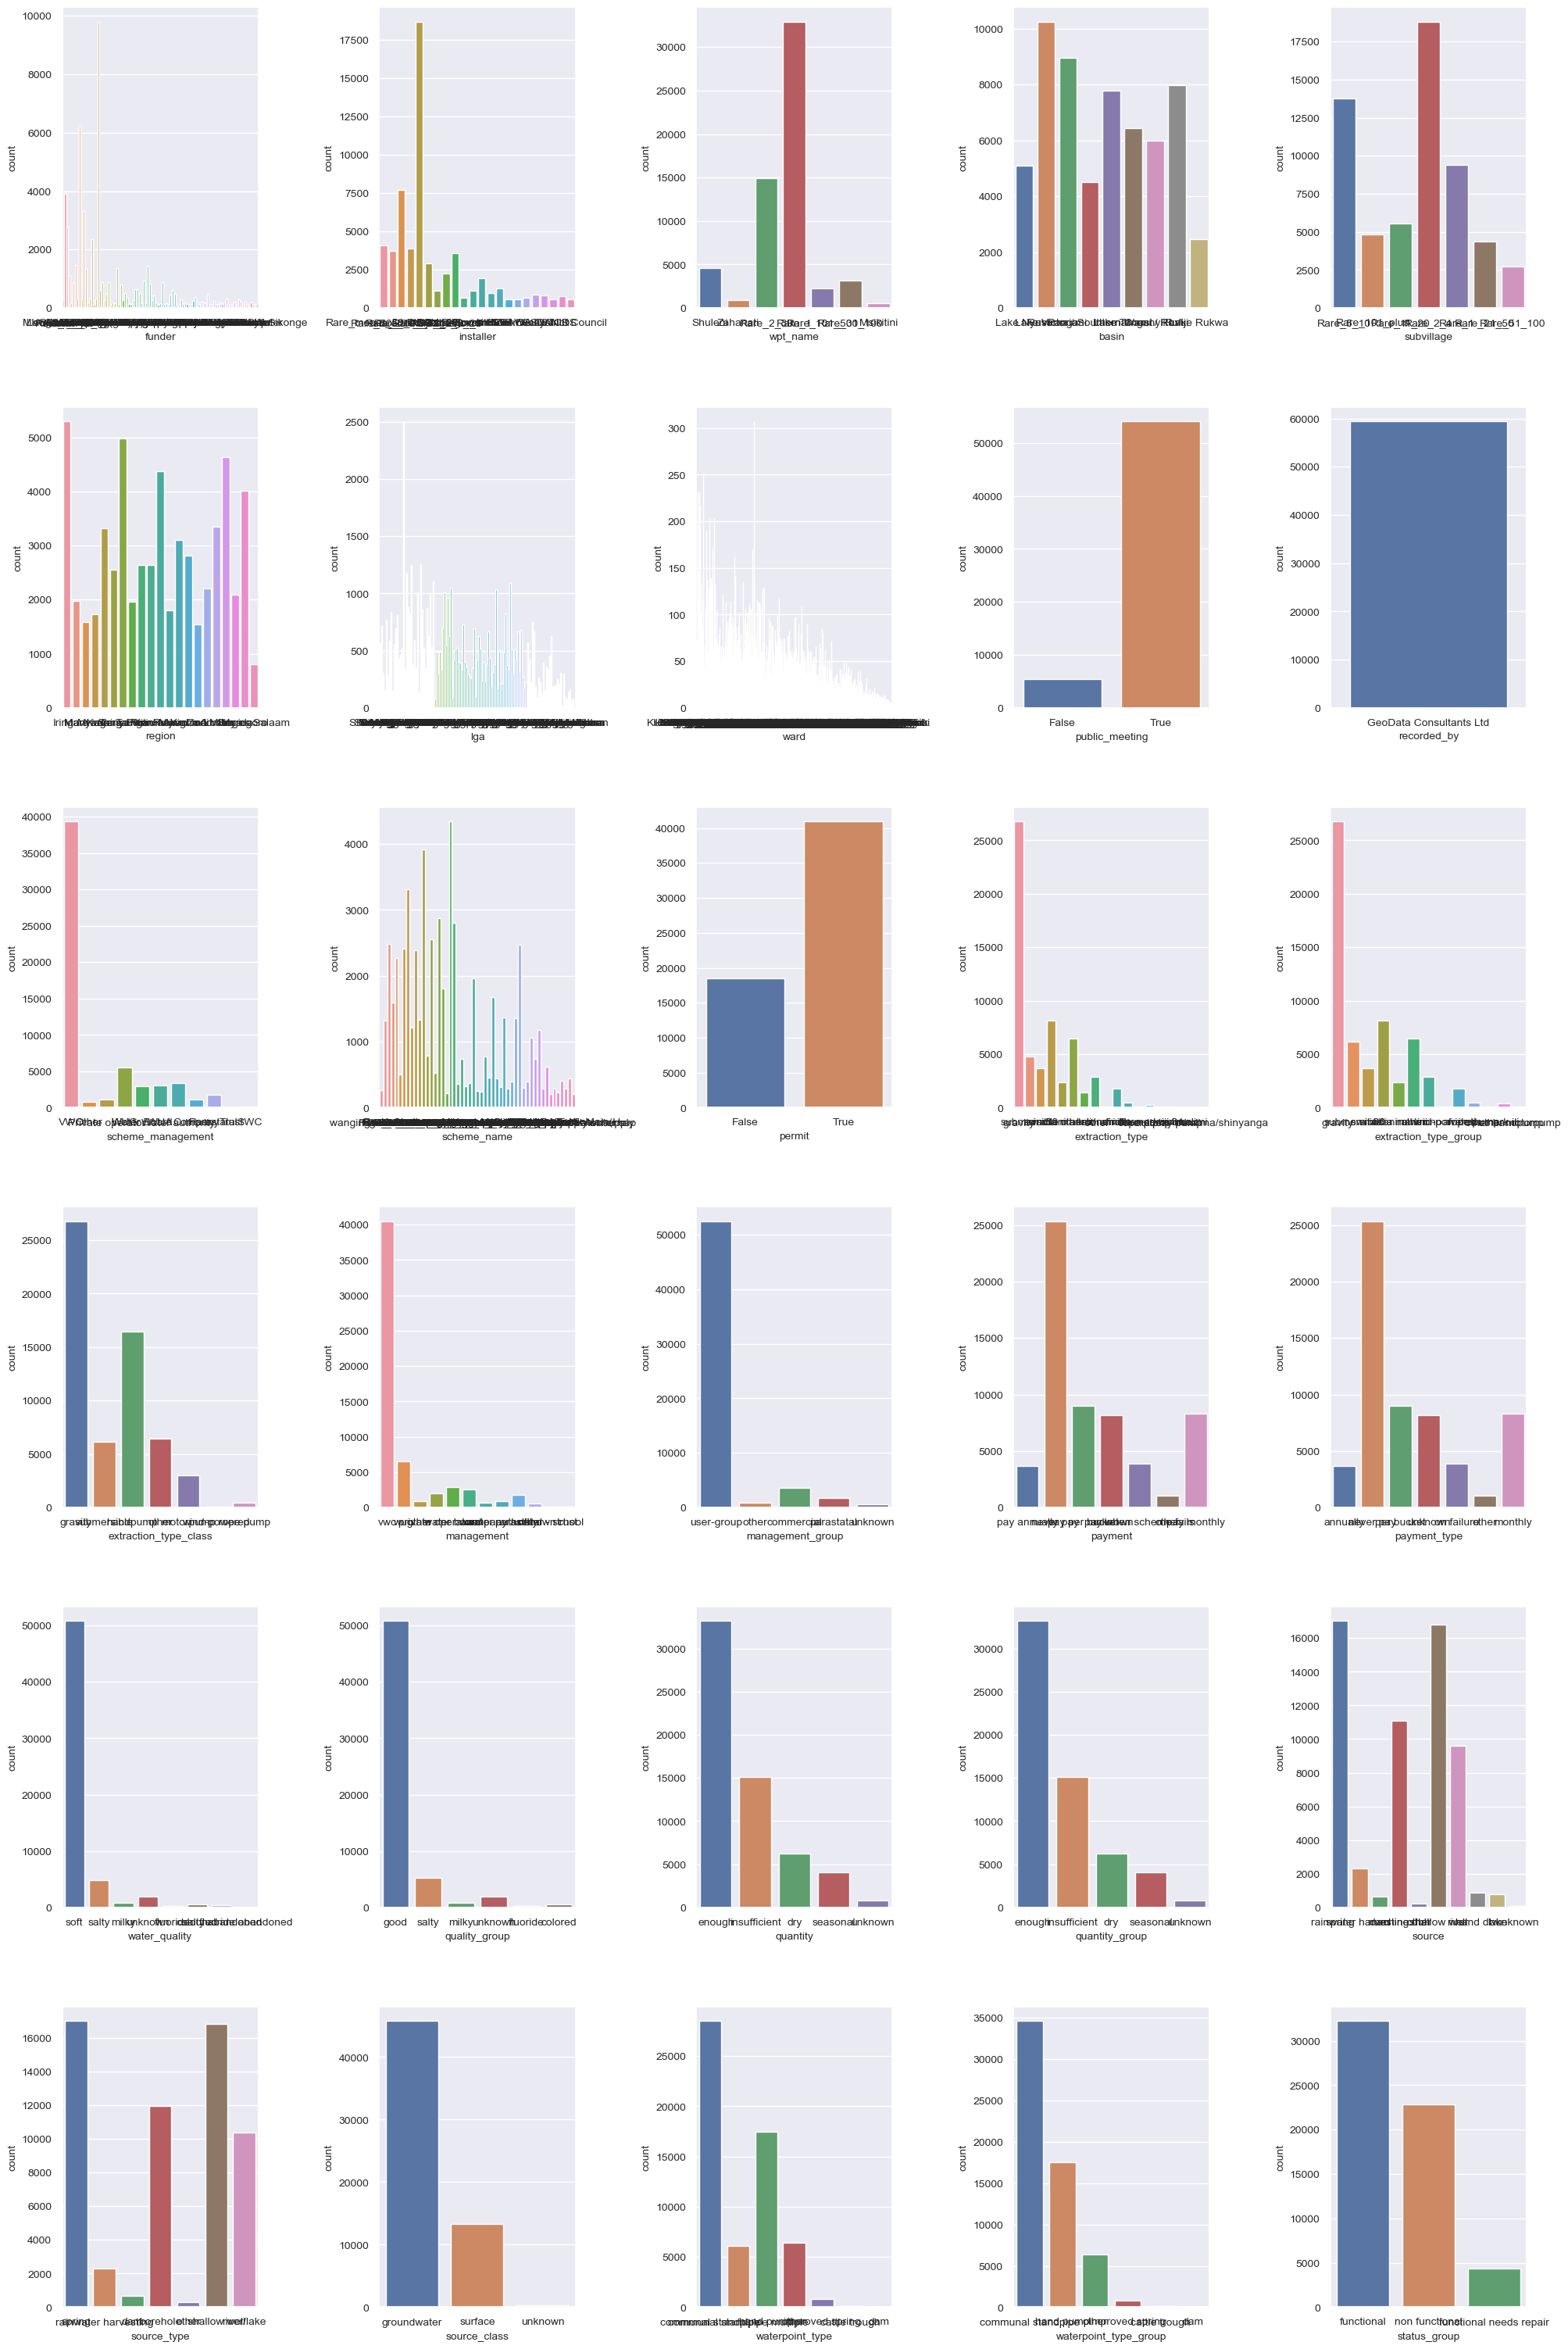

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calcular el número de subplots necesarios
num_plots = len(cat_cols)
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

# Crear subplots
fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20, 5 * num_rows))
axs = axs.flatten()

# Inicializar índice
index = 0

# Iterar sobre las columnas categóricas
for col in cat_cols:
    sns.countplot(data=train, x=col, ax=axs[index])
    index += 1

# Ajustar el diseño
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

C:\Users\Fran\AppData\Local\Temp\ipykernel_18340\2586130762.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, bins=20, ax=axs[index])
C:\Users\Fran\AppData\Local\Temp\ipykernel_18340\2586130762.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, bins=20, ax=axs[index])
C:\Users\Fran\Ap

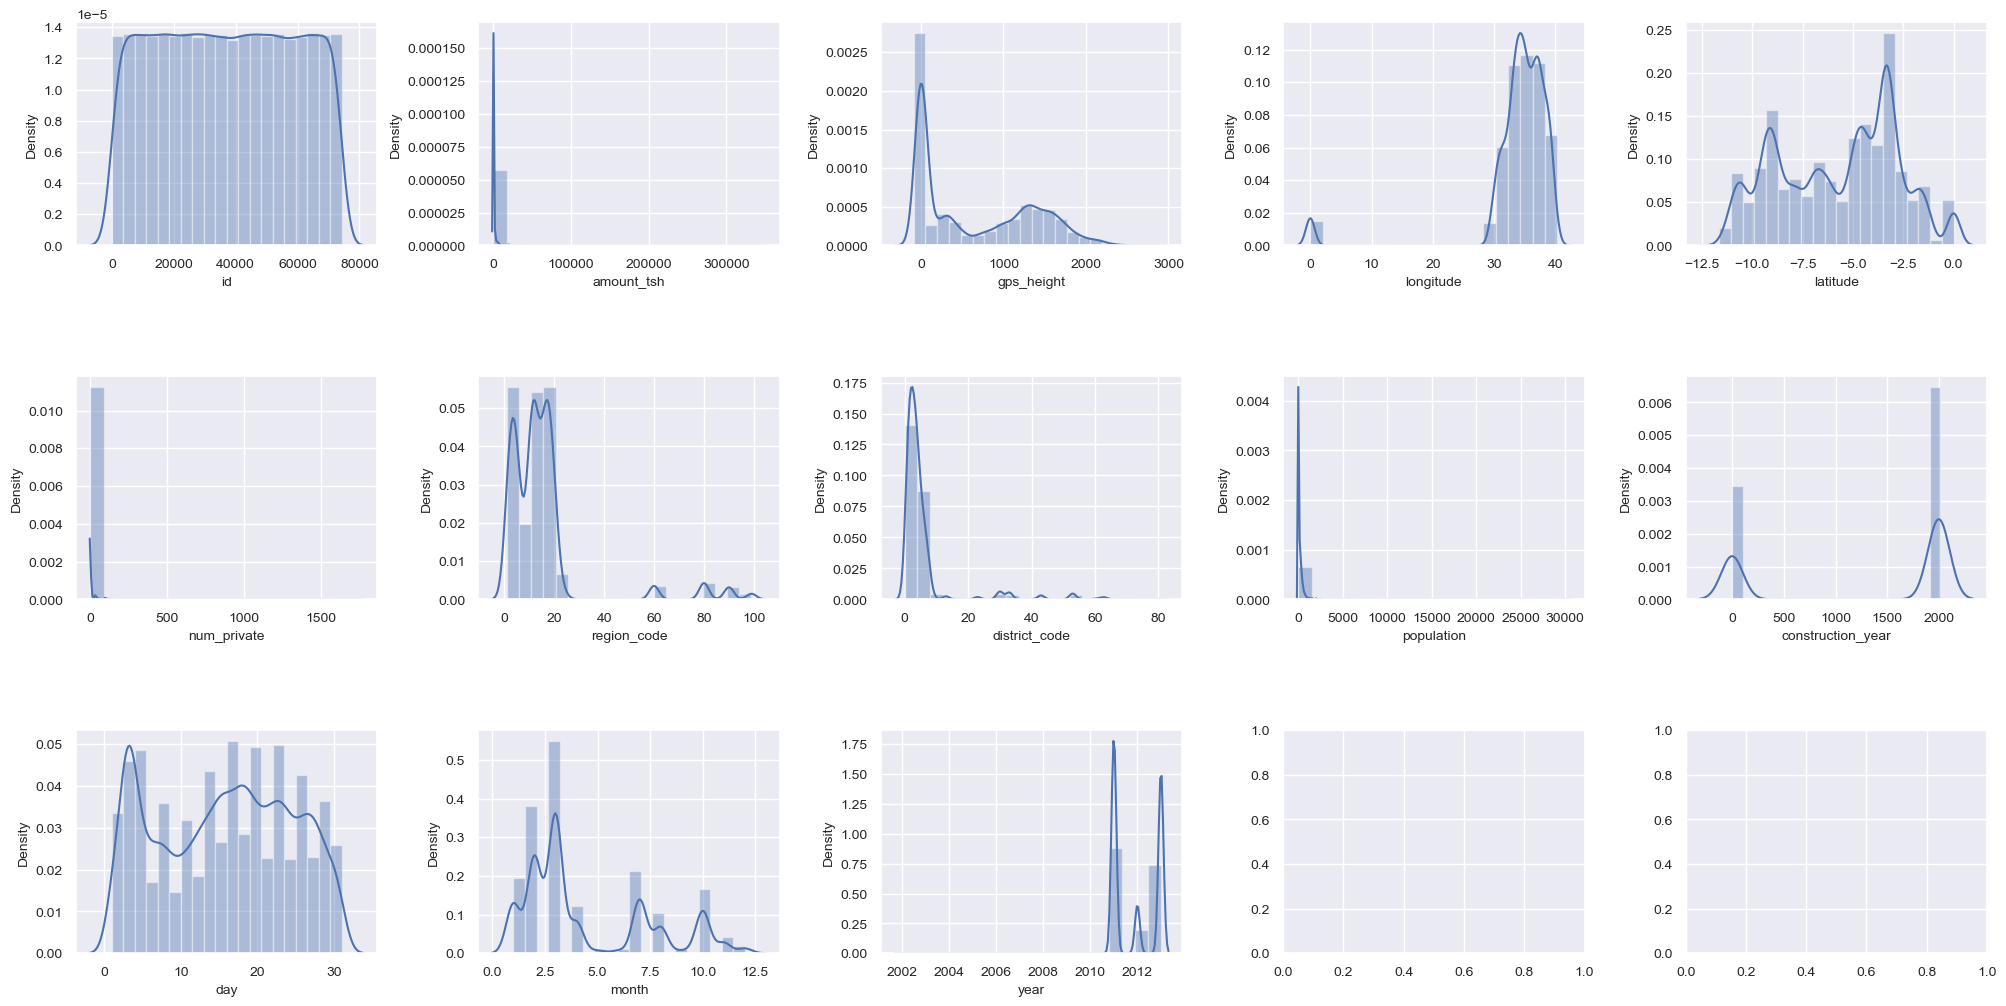

In [84]:
num_cols = train.select_dtypes(include='number').columns.tolist()
#Variables numéricas
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in train[num_cols].items(): 
    if  (k == 'permanencia'):
        sns.countplot(v, ax=axs[index])
    else:
        sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [85]:
import pandas as pd
import numpy as np

# Calcular la proporción de cada año de construcción sobre el total de observaciones no nulas
total_non_zero = train['construction_year'].loc[train['construction_year'] != 0].count()
proportions = train['construction_year'].loc[train['construction_year'] != 0].value_counts() / total_non_zero

# Obtener la cantidad de valores 0
total_zeros = (train['construction_year'] == 0).sum()

# Multiplicar las proporciones por el total de valores 0
imputed_zeros = np.round(proportions * total_zeros).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores 0
imputed_zeros_delta = total_zeros - imputed_zeros.sum()
if imputed_zeros_delta > 0:
    first_non_zero_idx = imputed_zeros[imputed_zeros > 0].index[0]
    imputed_zeros[first_non_zero_idx] += imputed_zeros_delta

# Crear una lista con los años según las cantidades calculadas
impute_values = []
for year, count in imputed_zeros.items():
    impute_values.extend([year] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_zeros:
    impute_values = impute_values[:total_zeros]
elif len(impute_values) < total_zeros:
    additional_values = np.random.choice(proportions.index, size=total_zeros - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores 0 en la columna 'construction_year'
zero_indices = train['construction_year'][train['construction_year'] == 0].index
train.loc[zero_indices, 'construction_year'] = impute_values

# Mostrar los resultados
print("Total de valores 0:", total_zeros)
print("Proporciones de cada año:")
print(proportions)
print("Cantidad imputada a cada año:")
print(imputed_zeros)
print("Valores imputados:")
print(train['construction_year'].value_counts().sort_index())


Total de valores 0: 20709
Proporciones de cada año:
construction_year
2010    0.068362
2008    0.067535
2009    0.065467
2000    0.054044
2007    0.041017
2006    0.038019
2003    0.033238
2011    0.032462
2004    0.029025
2012    0.028017
2002    0.027784
1978    0.026802
1995    0.026208
2005    0.026130
1999    0.025303
1998    0.024967
1990    0.024657
1985    0.024424
1996    0.020961
1980    0.020961
1984    0.020134
1982    0.019229
1994    0.019074
1972    0.018299
1974    0.017472
1997    0.016645
1992    0.016541
1993    0.015714
2001    0.013957
1988    0.013466
1983    0.012613
1975    0.011295
1986    0.011217
1976    0.010700
1970    0.010623
1991    0.008374
1989    0.008167
1987    0.007805
1981    0.006151
1977    0.005221
1979    0.004962
1973    0.004756
2013    0.004549
1971    0.003748
1960    0.002636
1967    0.002274
1963    0.002197
1968    0.001990
1969    0.001525
1964    0.001034
1962    0.000775
1961    0.000543
1965    0.000491
1966    0.000439
Name: count,

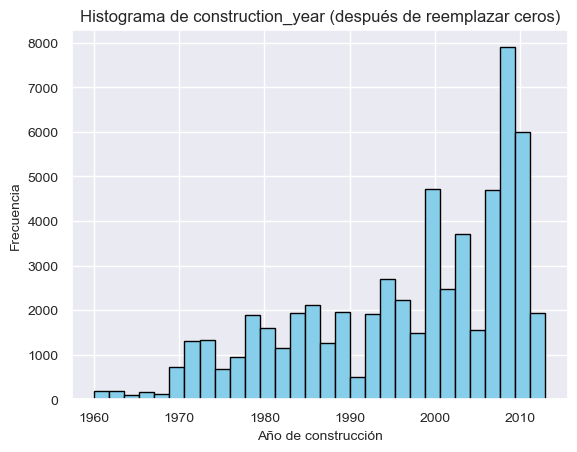

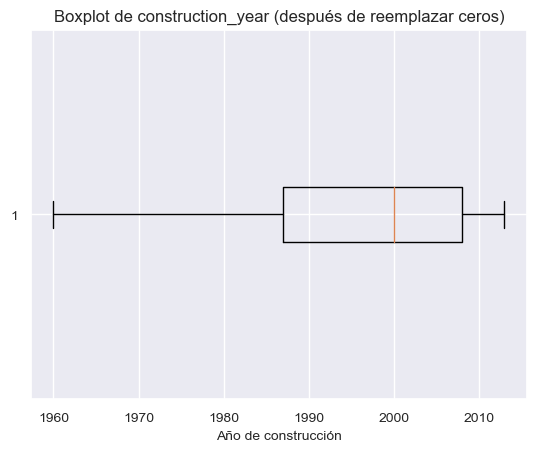

In [86]:
# Visualizar la distribución de construction_year después de reemplazar los ceros
plt.hist(train['construction_year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de construction_year (después de reemplazar ceros)')
plt.xlabel('Año de construcción')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para visualizar outliers después de reemplazar los ceros
plt.boxplot(train['construction_year'], vert=False)
plt.title('Boxplot de construction_year (después de reemplazar ceros)')
plt.xlabel('Año de construcción')
plt.show()


In [87]:
train.loc[train['population'] == 30500.000000, 'population'] = 150

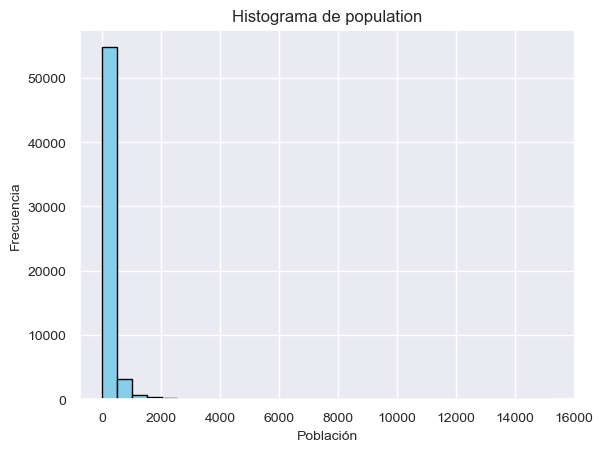

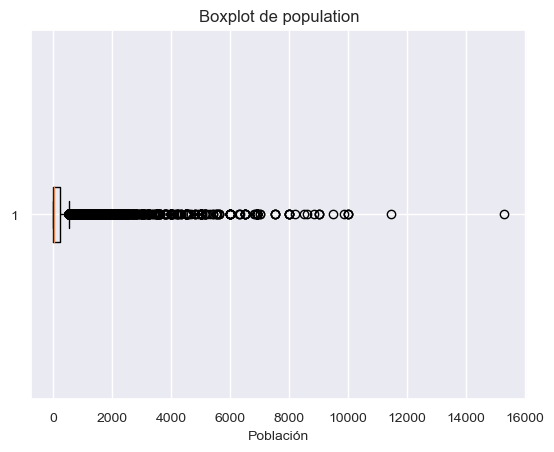

count    59400.00000
mean       179.39904
std        454.77288
min          0.00000
25%          0.00000
50%         25.00000
75%        214.25000
max      15300.00000
Name: population, dtype: float64
Low threshold: 0.0
Medium threshold: 214.25
population_category
Medium population    23169
No population        21381
High population      14850
Name: count, dtype: int64


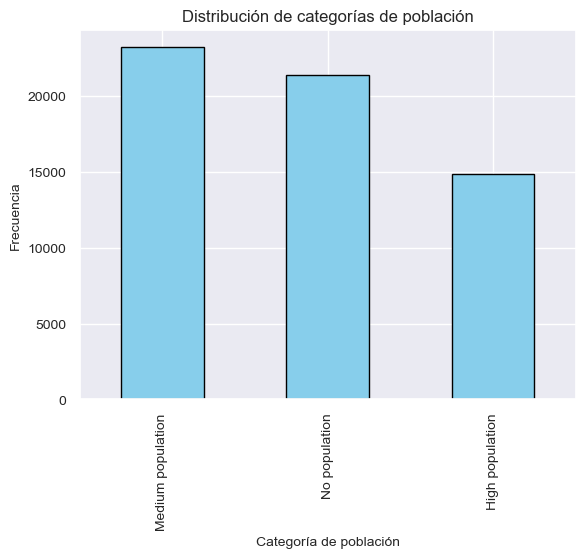

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualizar la distribución de population
plt.hist(train['population'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de population')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para visualizar outliers
plt.boxplot(train['population'], vert=False)
plt.title('Boxplot de population')
plt.xlabel('Población')
plt.show()

# Ver las estadísticas descriptivas de population
print(train['population'].describe())

# Definir los umbrales basados en cuantiles
low_threshold = train['population'].quantile(0.25)
medium_threshold = train['population'].quantile(0.75)

print(f'Low threshold: {low_threshold}')
print(f'Medium threshold: {medium_threshold}')

# Función para convertir la población en categorías
def categorize_population(pop):
    if pop == 0:
        return 'No population'
    elif pop <= low_threshold:
        return 'Low population'
    elif pop <= medium_threshold:
        return 'Medium population'
    else:
        return 'High population'

# Aplicar la función al DataFrame
train['population_category'] = train['population'].apply(categorize_population)

# Verificar la nueva columna
print(train['population_category'].value_counts())

# Visualizar la distribución de la nueva variable categórica
train['population_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de categorías de población')
plt.xlabel('Categoría de población')
plt.ylabel('Frecuencia')
plt.show()


In [89]:
train.drop('population', axis=1, inplace=True)


amount_tsh
0.0       41639
500.0      3102
50.0       2472
1000.0     1488
20.0       1463
200.0      1220
100.0       816
10.0        806
30.0        743
2000.0      704
Name: count, dtype: int64


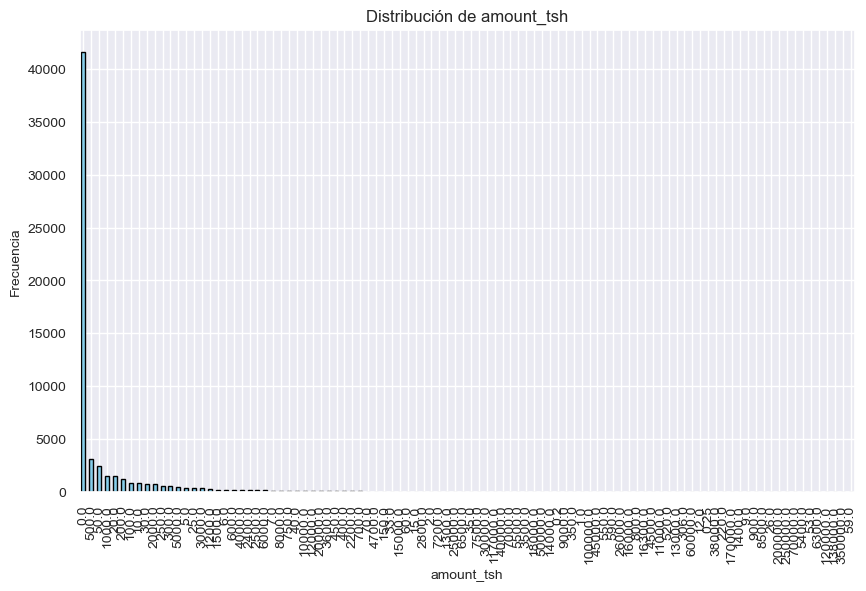

In [90]:
# Obtener el conteo de valores de amount_tsh
amount_tsh_counts = train['amount_tsh'].value_counts()

# Mostrar los primeros valores (por ejemplo, los 10 primeros)
print(amount_tsh_counts.head(10))

# Graficar la distribución de amount_tsh
plt.figure(figsize=(10, 6))
amount_tsh_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de amount_tsh')
plt.xlabel('amount_tsh')
plt.ylabel('Frecuencia')
plt.show()

In [91]:
# Definir la función para categorizar amount_tsh
def categorize_amount_tsh(amount):
    if amount == 0:
        return 'No water point'
    elif amount <= 50:
        return 'Low water availability'
    elif amount <= 500:
        return 'Medium water availability'
    else:
        return 'High water availability'

# Aplicar la función al DataFrame para crear una nueva columna categorizada
train['amount_tsh_category'] = train['amount_tsh'].apply(categorize_amount_tsh)

# Eliminar la columna original amount_tsh
train.drop('amount_tsh', axis=1, inplace=True)

# Verificar que la columna original haya sido eliminada
print(train)




          id           funder  gps_height               installer  longitude  \
0      69572            Roman        1390             Rare_50_100  34.938093   
1       8776       Rare_50_99        1399  Rare_menor_50_mayor_20  34.698766   
2      34310         Rare_1_9         686            Rare_201_500  37.460664   
3      67743           Unicef         263            Rare_201_500  38.486161   
4      19728         Rare_1_9           0            Rare_101_150  31.130847   
...      ...              ...         ...                     ...        ...   
59395  60739  Germany Republi        1210                     CES  37.169807   
59396  27263       Rare_10_49        1212               Rare_5_20  35.249991   
59397  37057         Rare_1_9           0               Rare_5_20  34.017087   
59398  31282         Rare_1_9           0               Rare_5_20  35.861315   
59399  26348       World Bank         191            Rare_101_150  38.104048   

        latitude   wpt_name  num_privat

In [92]:
# Identificar las columnas numéricas
num_cols = train.select_dtypes(include=[np.number]).columns
print("Columnas numéricas:", num_cols)

def remove_outliers(df, columns):
    for col in columns:
        # Calcular el primer y tercer cuartil
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calcular el rango intercuartil (IQR)
        IQR = Q3 - Q1
        
        # Definir los límites para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar los datos para eliminar los outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Eliminar outliers para todas las columnas numéricas
train_cleaned = remove_outliers(train, num_cols)

Columnas numéricas: Index(['id', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'construction_year', 'day', 'month',
       'year'],
      dtype='object')


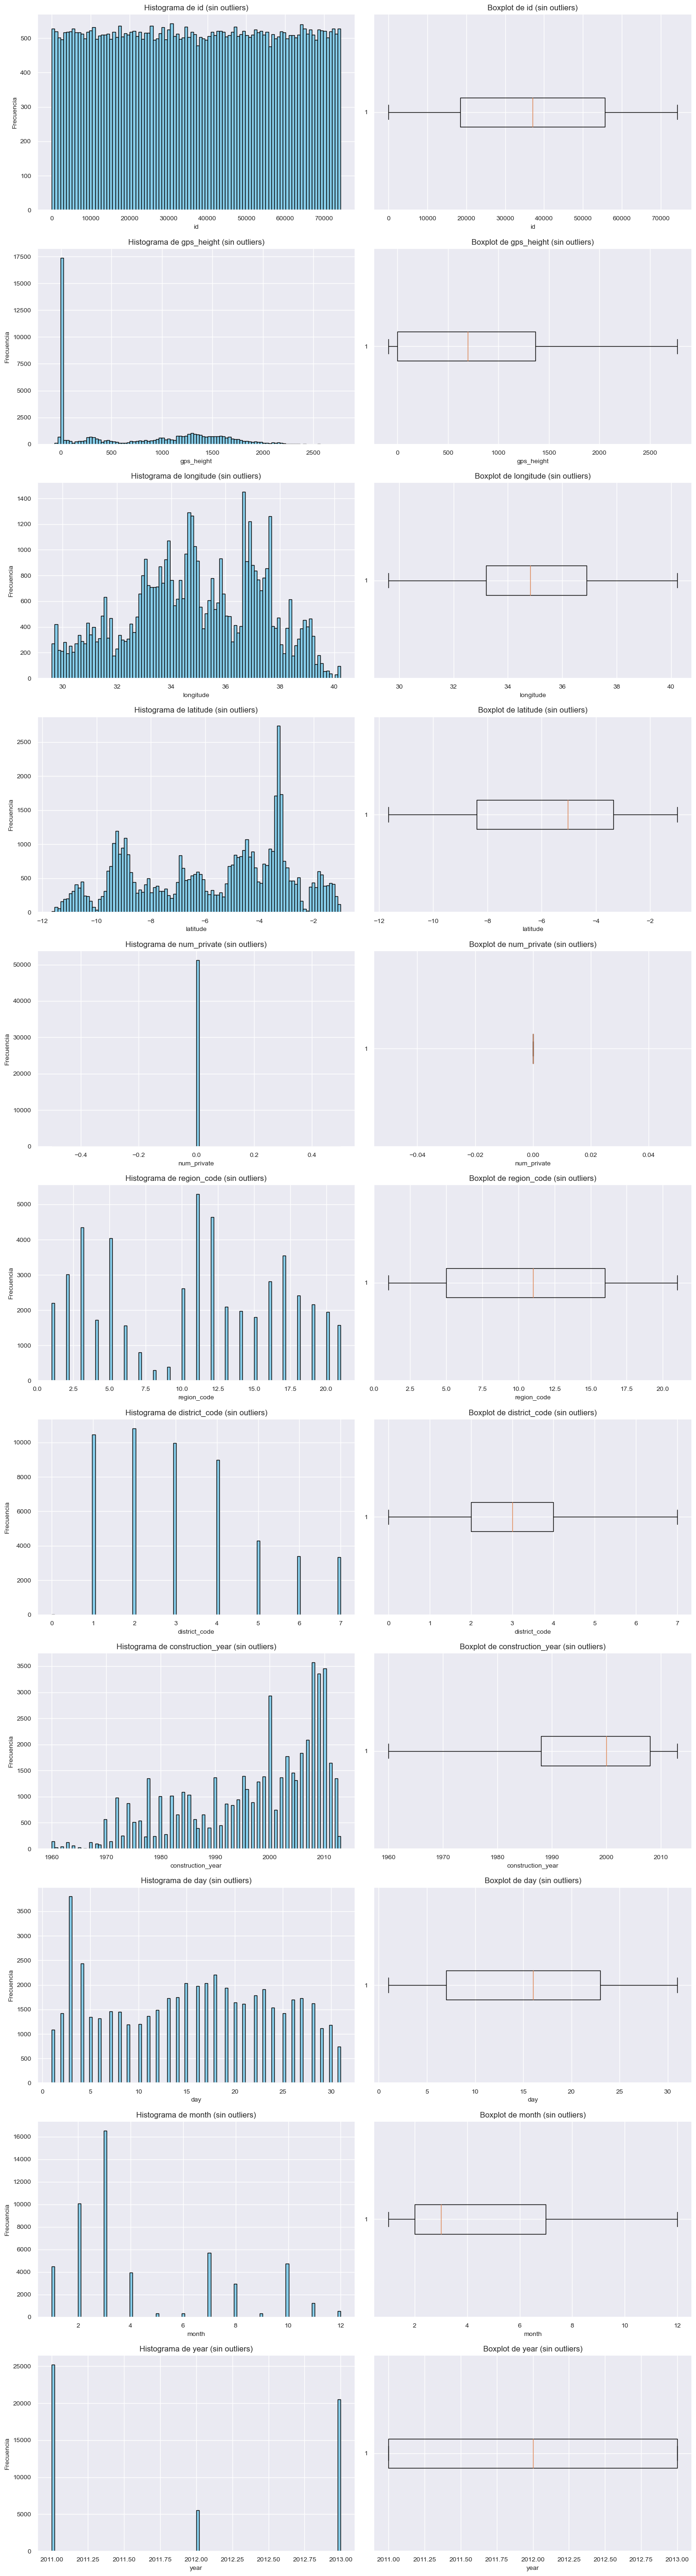

In [93]:
# Visualizar histogramas y boxplots para todas las columnas numéricas
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(15, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    # Histograma
    axes[i, 0].hist(train_cleaned[col], bins=100, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histograma de {col} (sin outliers)')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frecuencia')

    # Diagrama de caja (boxplot)
    axes[i, 1].boxplot(train_cleaned[col], vert=False)
    axes[i, 1].set_title(f'Boxplot de {col} (sin outliers)')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()



Para abordar la variable population, se aplicó una estrategia similar a la utilizada para la variable funder, con el objetivo de manejar los valores nulos sin perder una gran cantidad de datos. Eliminar las observaciones con valores nulos hubiera resultado en una pérdida significativa de información, lo cual no era deseable.

Proceso de Imputación de Valores Nulos
1. Calcular las proporciones de cada categoría:
Primero, se calcularon las proporciones de cada categoría en la variable population en función del total de observaciones no nulas. Esto permitió entender la distribución actual de las categorías.

2. Determinar la cantidad de valores nulos:
Luego, se determinó la cantidad total de valores nulos presentes en la variable population.

3. Imputar valores nulos basado en las proporciones calculadas:
Se calculó cuántos valores nulos deberían asignarse a cada categoría en función de sus proporciones. Esto se hizo multiplicando las proporciones por el número total de valores nulos y redondeando los resultados.

4. Ajuste de la distribución:
Para asegurarse de que el total de valores imputados coincidiera exactamente con el número de valores nulos, se realizaron ajustes menores. Si había una discrepancia debido al redondeo, se ajustó el valor de la categoría más frecuente para compensar la diferencia.

Agrupación y Transformación de la Variable Population
A diferencia de la variable funder, en lugar de hacer una reagrupación posterior a la imputación de valores nulos, se decidió transformar la variable population en tres grupos distintos. Esta decisión se basó en la representación de la población que habitaba cerca de lugares con bombas de agua y en el análisis de un boxplot que mostraba que muchas observaciones se perdían debido a la distribución de los datos.

Transformación en Grupos:

Sin Población: Incluye observaciones donde la población es 0.
Población Baja: Incluye observaciones donde la población es menor o igual al percentil 0.25.
Población Media: Incluye observaciones donde la población es menor o igual al percentil 0.75.
Alta Población: Incluye observaciones donde la población es mayor al percentil 0.75.
Esta transformación permitió simplificar la variable population, reduciendo la dimensionalidad y mejorando la estabilidad del modelo, sin perder un número significativo de observaciones.

Aplicación en la Variable Amount
El mismo enfoque también se aplicó a la variable amount. Se crearon grupos basados en los cuantiles de la distribución de la variable amount, asegurando así una representación más equitativa y manejable de los datos en el análisis.

In [95]:
train_cleaned[num_cols].describe()

,id,gps_height,longitude,latitude,num_private,region_code,district_code,construction_year,day,month,year
count,51249.000000,51249.000000,51249.000000,51249.000000,51249.0,51249.000000,51249.000000,51249.000000,51249.000000,51249.000000,51249.000000
mean,37127.048586,739.339851,34.897465,-5.748341,0.0,10.794142,3.180140,1996.867041,15.357431,4.448984,2011.908057
std,21470.596454,700.761113,2.422784,2.736180,0.0,6.022995,1.773173,12.406447,8.669823,3.002525,0.939689
min,0.000000,-90.000000,29.607122,-11.649440,0.0,1.000000,0.000000,1960.000000,1.000000,1.000000,2011.000000
25%,18530.000000,0.000000,33.204679,-8.385803,0.0,5.000000,2.000000,1988.000000,7.000000,2.000000,2011.000000
50%,37072.000000,694.000000,34.827052,-5.038109,0.0,11.000000,3.000000,2000.000000,16.000000,3.000000,2012.000000
75%,55685.000000,1367.000000,36.894172,-3.358872,0.0,16.000000,4.000000,2008.000000,23.000000,7.000000,2013.000000
max,74247.000000,2770.000000,40.231707,-0.998464,0.0,21.000000,7.000000,2013.000000,31.000000,12.000000,2013.000000


In [96]:
cat_cols1= train_cleaned.select_dtypes(include=['object','category']).columns
print(train_cleaned[cat_cols1].describe().transpose())


                       count unique                      top   freq
funder                 51249     95   Government Of Tanzania   8855
installer              51249     22                      DWE  16238
wpt_name               51249      7                   Rare_1  28683
basin                  51249      9                  Pangani   8115
subvillage             51249      7                 Rare_2_4  16236
region                 51249     21                   Iringa   5286
lga                    51249    111                   Njombe   2502
ward                   51249   1788                    Igosi    307
public_meeting         51249      2                     True  46728
recorded_by            51249      1  GeoData Consultants Ltd  51249
scheme_management      51249     11                      VWC  33620
scheme_name            51249     51                Rare_8_12   3656
permit                 51249      2                     True  36342
extraction_type        51249     18             

In [97]:
train_cleaned.dtypes

id                         int64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity  

In [98]:
variables_dummies = ['funder','installer','wpt_name','basin','subvillage','region','lga','ward','scheme_management','recorded_by','scheme_name','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type','waterpoint_type_group','status_group','population_category','amount_tsh_category','public_meeting','permit']

In [99]:
import pickle

# Lista de variables categóricas a convertir
variables_categoricas = variables_dummies

# Crear un diccionario para almacenar los mapeos inversos
mapeo_inverso = {}

# Iterar sobre las variables categóricas y convertirlas en numéricas
for var in variables_categoricas:
    # Factorizar y obtener los códigos y los niveles originales
    codes, uniques = pd.factorize(train_cleaned[var])
    
    # Crear un diccionario de mapeo inverso
    mapeo_inverso[var] = dict(zip(range(1, len(uniques) + 1), uniques))
    
    # Reemplazar la columna original por la columna numérica + 1 (para empezar desde 1)
    train_cleaned[var] = codes + 1

# Verificar el resultado y mostrar el mapeo inverso para 'funder' como ejemplo
print(train_cleaned.head())

# Nombre del archivo donde guardarás el diccionario
nombre_archivo = 'mapeo_inverso.pkl'

# Guardar el diccionario mapeo_inverso en un archivo usando pickle
with open(nombre_archivo, 'wb') as f:
    pickle.dump(mapeo_inverso, f)

print(f"Diccionario mapeo_inverso guardado en {nombre_archivo}")

# Mostrar el mapeo inverso para todas las variables categóricas
for var, mapeo in mapeo_inverso.items():
    print(f"Mapeo inverso para '{var}': {mapeo}")

      id  funder  gps_height  installer  longitude  latitude  wpt_name  \
0  69572       1        1390          1  34.938093 -9.856322         1   
1   8776       2        1399          2  34.698766 -2.147466         2   
2  34310       3         686          3  37.460664 -3.821329         3   
4  19728       3           0          4  31.130847 -1.825359         1   
6  19816       4           0          3  33.362410 -3.766365         4   

   num_private  basin  subvillage  ...  source_type  source_class  \
0            0      1           1  ...            1             1   
1            0      2           1  ...            2             2   
2            0      3           2  ...            3             2   
4            0      2           3  ...            2             2   
6            0      4           3  ...            4             1   

   waterpoint_type  waterpoint_type_group  status_group  day  month  year  \
0                1                      1             1   14   

In [100]:
# Recodificar las etiquetas de 1, 2, 3 a 0, 1, 2
train_cleaned['status_group'] = train_cleaned['status_group'].map({1: 0, 2: 1, 3: 2})

# Verificar las etiquetas recodificadas
print("Clases únicas en status_group recodificado:", train_cleaned['status_group'].unique())


Clases únicas en status_group recodificado: [0 1 2]


In [101]:
train_cleaned

,id,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,day,month,year,population_category,amount_tsh_category
0,69572,1,1390,1,34.938093,-9.856322,1,0,1,1,...,1,1,1,1,0,14,3,2011,1,1
1,8776,2,1399,2,34.698766,-2.147466,2,0,2,1,...,2,2,1,1,0,6,3,2013,2,2
2,34310,3,686,3,37.460664,-3.821329,3,0,3,2,...,3,2,2,1,0,25,2,2013,2,3
4,19728,3,0,4,31.130847,-1.825359,1,0,2,3,...,2,2,1,1,0,13,7,2011,3,2
6,19816,4,0,3,33.362410,-3.766365,4,0,4,3,...,4,1,3,2,1,1,10,2012,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,33,1210,17,37.169807,-3.253847,4,0,3,3,...,1,1,1,1,0,3,5,2013,1,3
59396,27263,7,1212,8,35.249991,-9.070629,4,0,6,6,...,6,2,1,1,0,7,5,2011,1,1
59397,37057,3,0,8,34.017087,-8.750434,3,0,6,3,...,4,1,3,2,0,11,4,2011,3,2
59398,31282,3,0,8,35.861315,-6.378573,4,0,6,5,...,5,1,3,2,0,8,3,2011,3,2


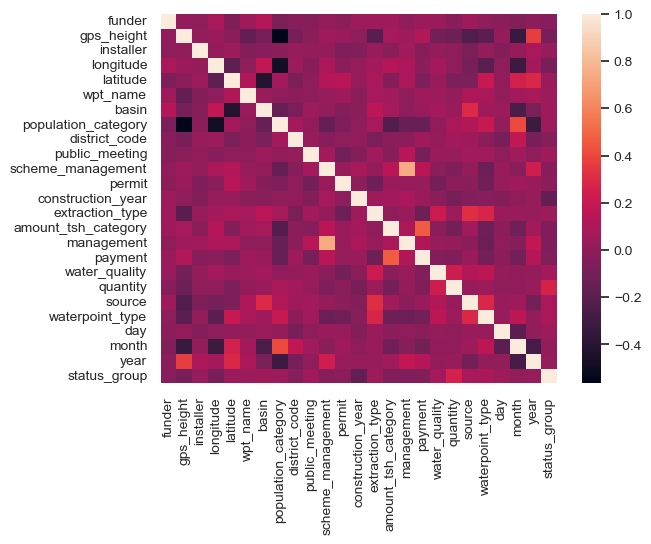

In [102]:
list_correlacion = ['funder', 'gps_height', 'installer', 'longitude', 'latitude',
       'wpt_name', 'basin','population_category','district_code','public_meeting', 'scheme_management',
       'permit','construction_year','extraction_type','amount_tsh_category','management','payment','water_quality','quantity','source','waterpoint_type',
        'day','month','year','status_group']

df_correlacion = train_cleaned[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

In [103]:
# Lista de columnas que deseas conservar
# Existe correlacion entre variable debido a que hay distintas vairables que son lo mismo
columnas_deseadas = ['id','funder', 'gps_height', 'installer', 'longitude', 'latitude',
                     'wpt_name', 'basin', 'population_category', 'district_code', 'public_meeting', 
                     'scheme_management', 'permit', 'construction_year', 'extraction_type', 
                     'amount_tsh_category', 'management', 'payment', 'water_quality', 'quantity', 
                     'source', 'waterpoint_type', 'day', 'month', 'year', 'status_group']

# Seleccionar solo las columnas deseadas en tu DataFrame actual
train_cleaned = train_cleaned.loc[:, columnas_deseadas]

# Verificar que se hayan seleccionado correctamente las columnas
print(train_cleaned.head())

# También puedes guardar este DataFrame con las columnas seleccionadas si lo deseas
# train_cleaned_selected.to_csv('train_cleaned_selected.csv', index=False)


      id  funder  gps_height  installer  longitude  latitude  wpt_name  basin  \
0  69572       1        1390          1  34.938093 -9.856322         1      1   
1   8776       2        1399          2  34.698766 -2.147466         2      2   
2  34310       3         686          3  37.460664 -3.821329         3      3   
4  19728       3           0          4  31.130847 -1.825359         1      2   
6  19816       4           0          3  33.362410 -3.766365         4      4   

   population_category  district_code  ...  management  payment  \
0                    1              5  ...           1        1   
1                    2              2  ...           2        2   
2                    2              4  ...           1        3   
4                    3              1  ...           3        2   
6                    3              3  ...           1        2   

   water_quality  quantity  source  waterpoint_type  day  month  year  \
0              1         1       1   

In [104]:
train_cleaned.dtypes

id                       int64
funder                   int64
gps_height               int64
installer                int64
longitude              float64
latitude               float64
wpt_name                 int64
basin                    int64
population_category      int64
district_code            int64
public_meeting           int64
scheme_management        int64
permit                   int64
construction_year        int64
extraction_type          int64
amount_tsh_category      int64
management               int64
payment                  int64
water_quality            int64
quantity                 int64
source                   int64
waterpoint_type          int64
day                      int32
month                    int32
year                     int32
status_group             int64
dtype: object

In [105]:
train_cleaned.set_index('id', inplace=True)

In [106]:
corr = abs(train_cleaned.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
quantity,0.255018
construction_year,0.162461
waterpoint_type,0.098579
source,0.086977
gps_height,0.083267
longitude,0.082890
water_quality,0.069012
management,0.058448
public_meeting,0.056803


In [107]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%fugas'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%fugas']>0) & (proporcion['Conteo']>10)]  
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%fugas'].values, linestyle='-', linewidth=2.0,color='g')
        plt.ylim(0, 100) # modificación.
        plt.tight_layout()   
        
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%fugas', data=proporcion_filtered,fit_reg=True,ci=None)

C:\Users\Fran\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Fran\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Fran\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Fran\AppData\Local\Temp\ipykernel_18340\3214928767.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


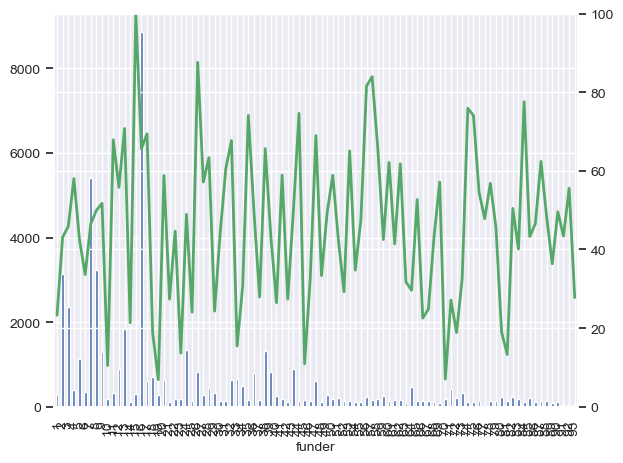

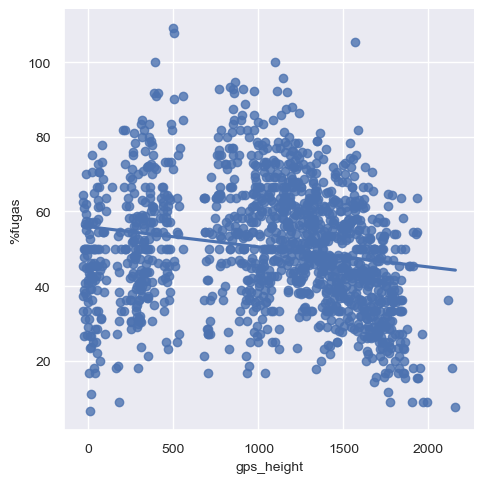

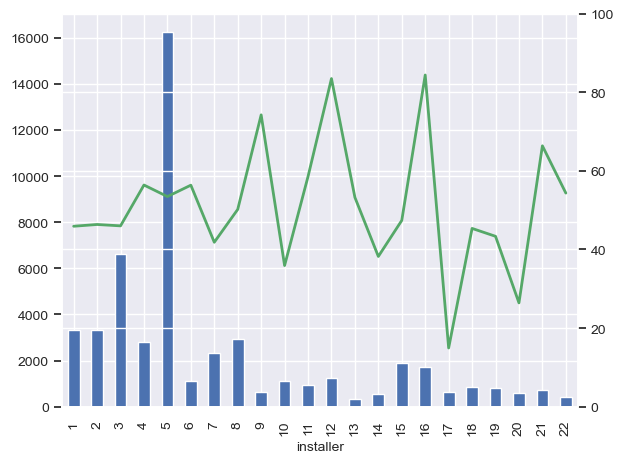

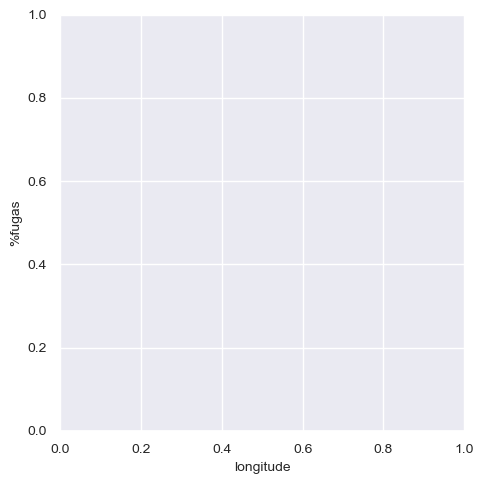

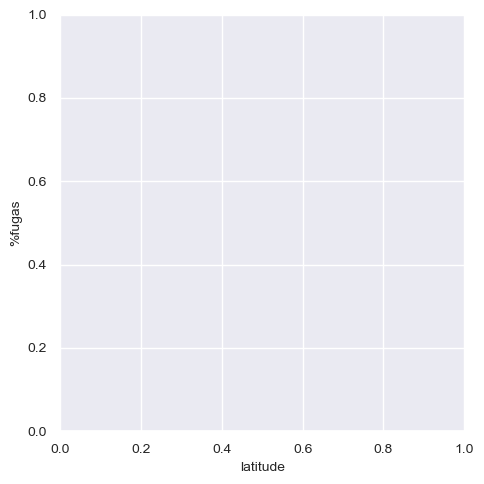

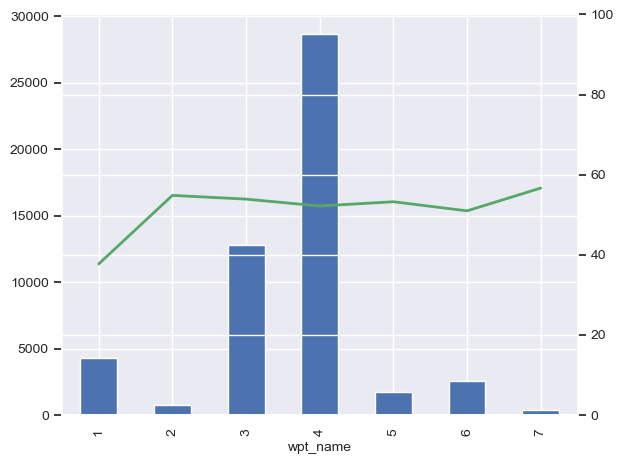

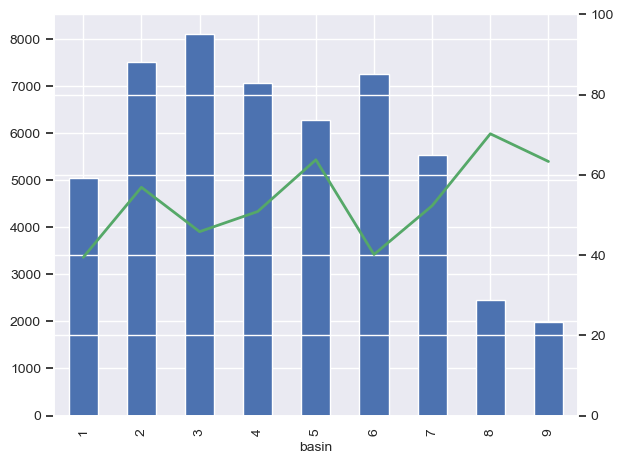

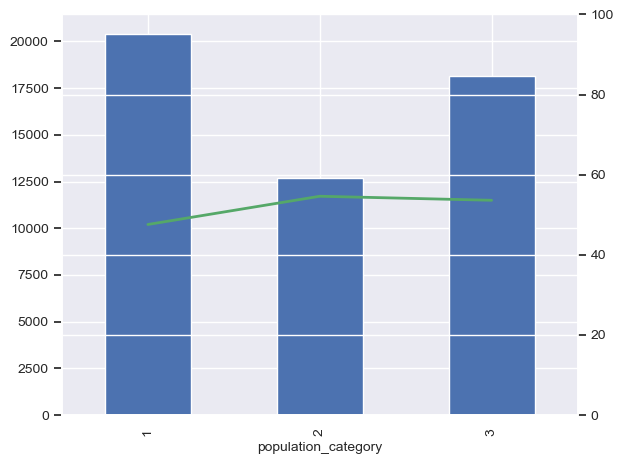

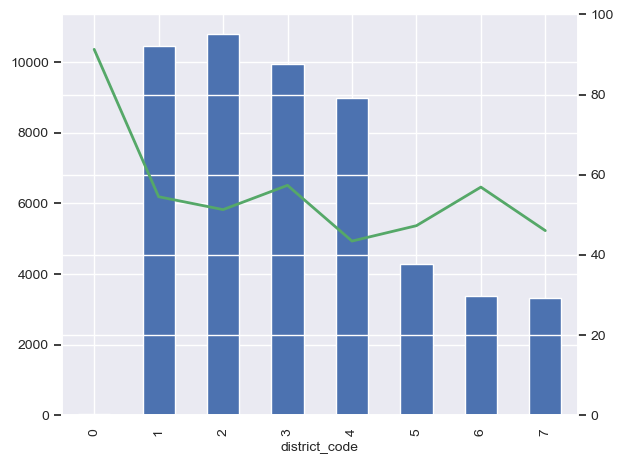

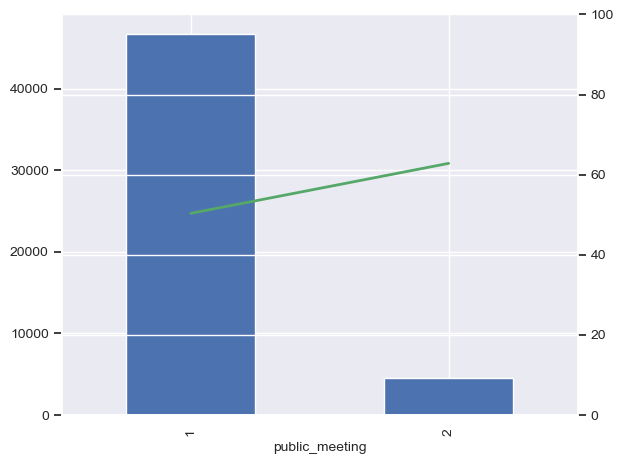

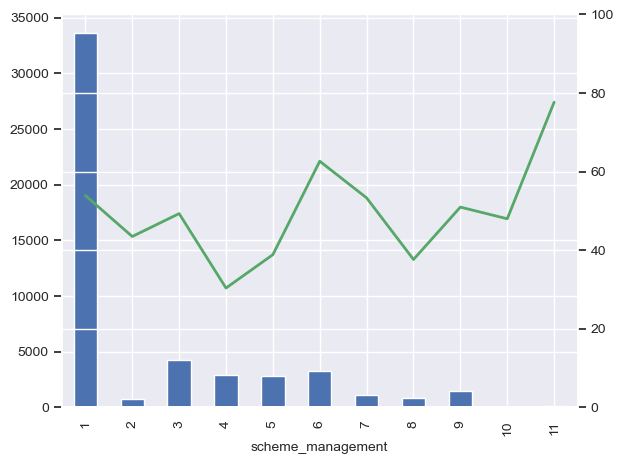

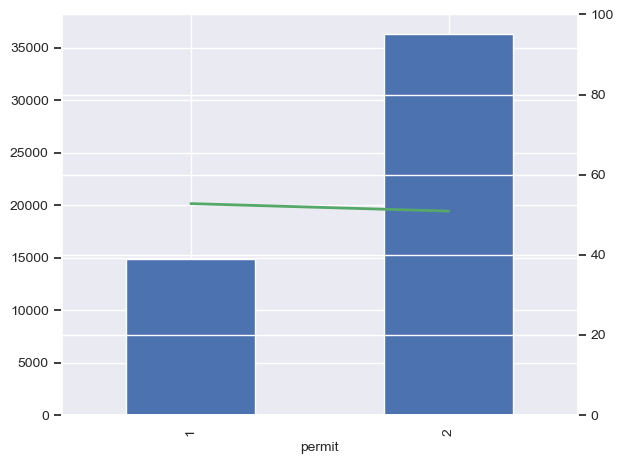

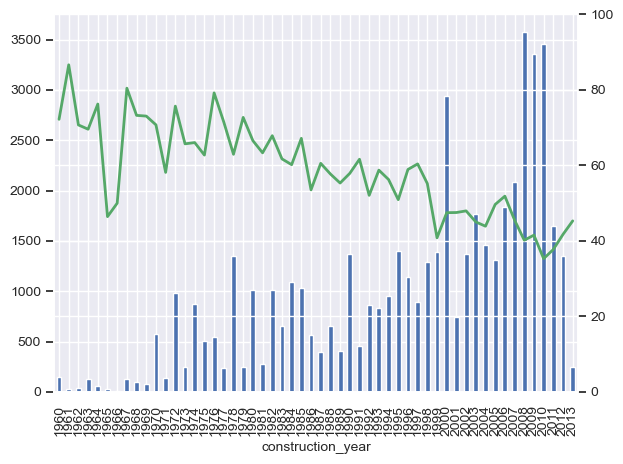

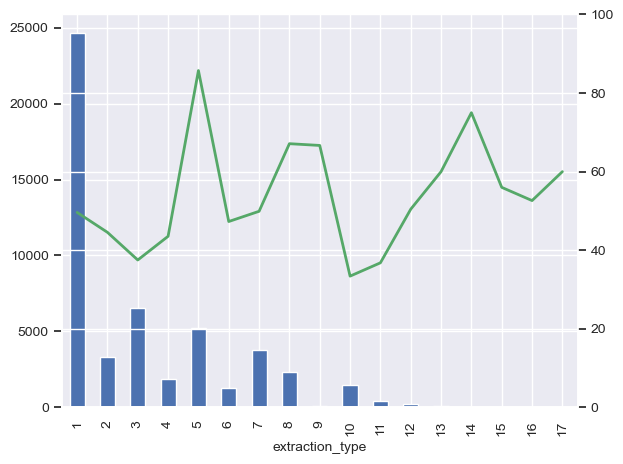

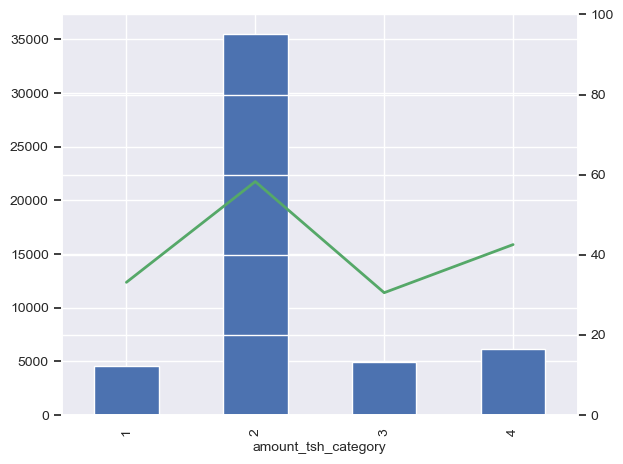

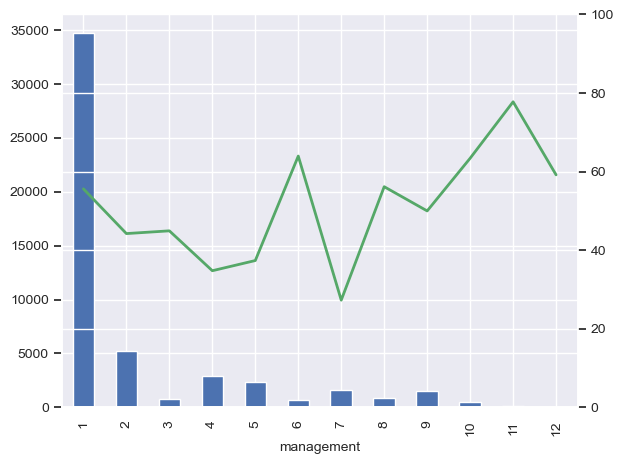

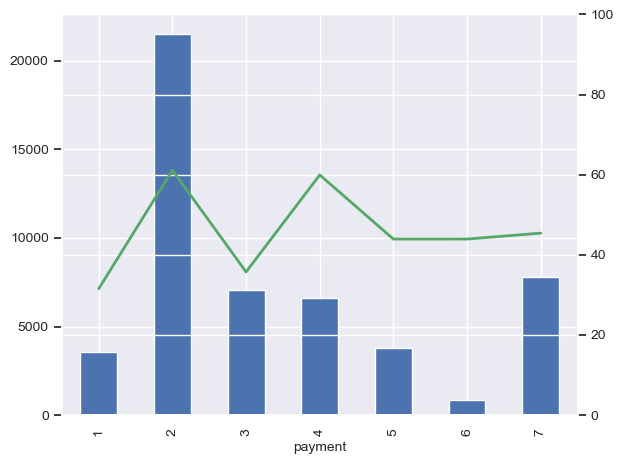

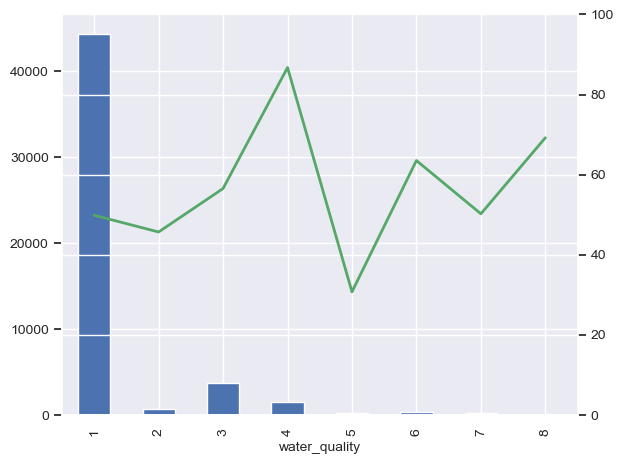

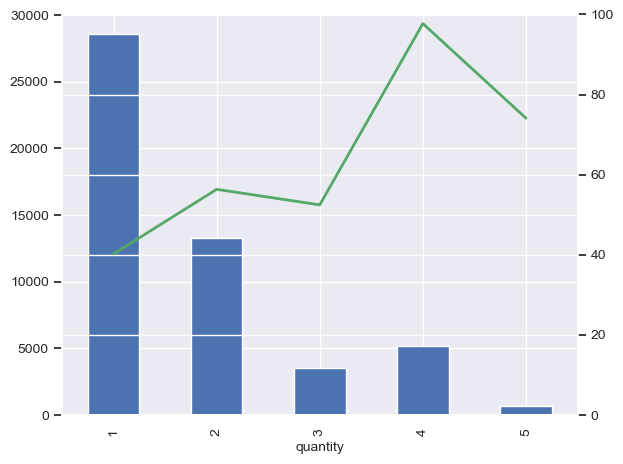

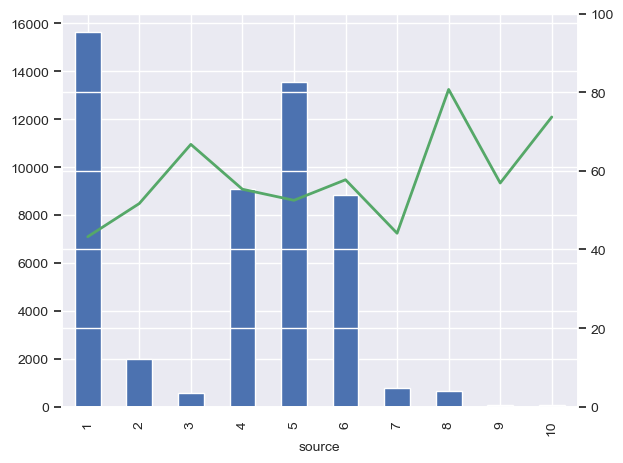

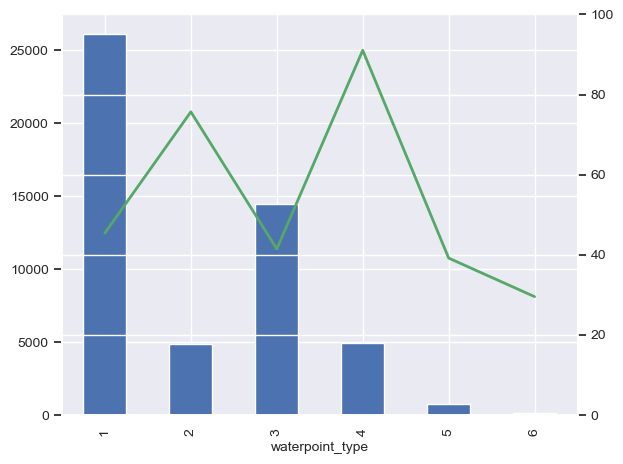

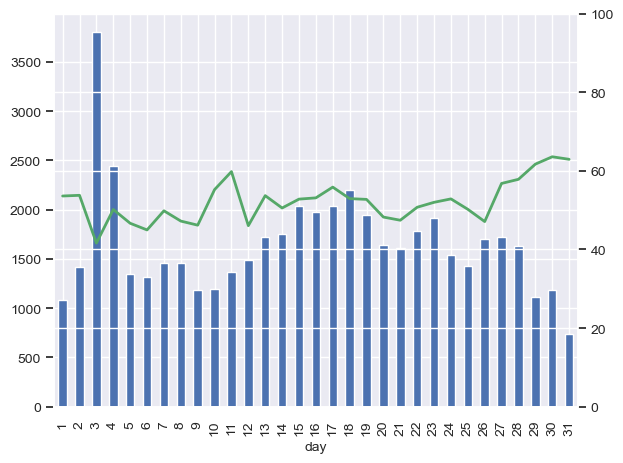

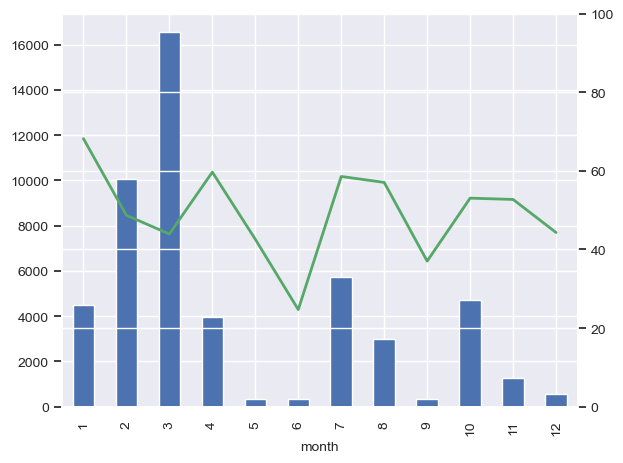

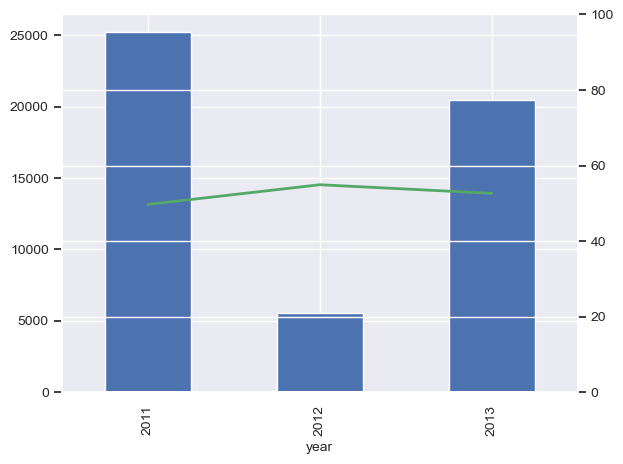

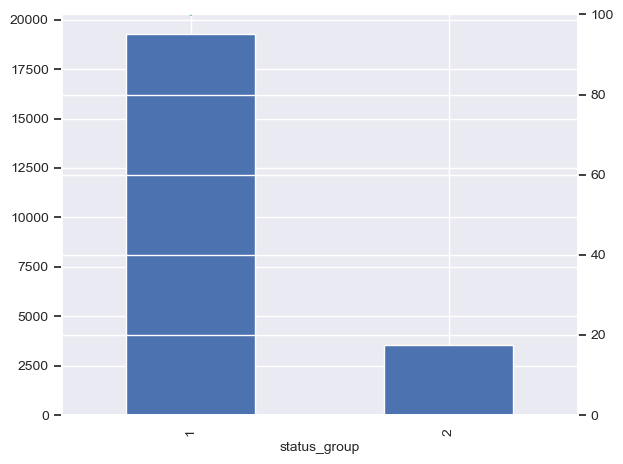

In [108]:
for i in train_cleaned.columns:
    proporciones_final (i, 'status_group', train_cleaned)

- AUC (macro): 0.73


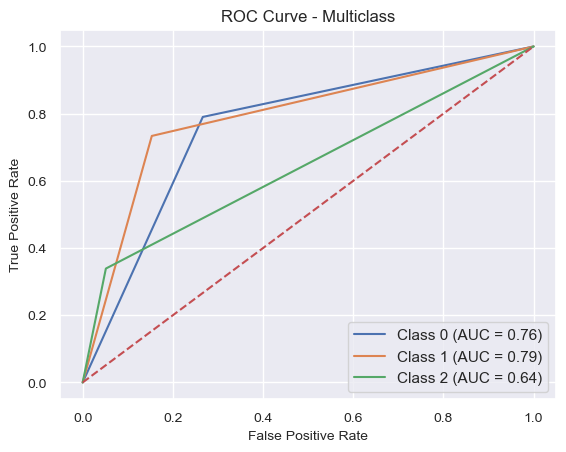

- AUC (macro): 0.89


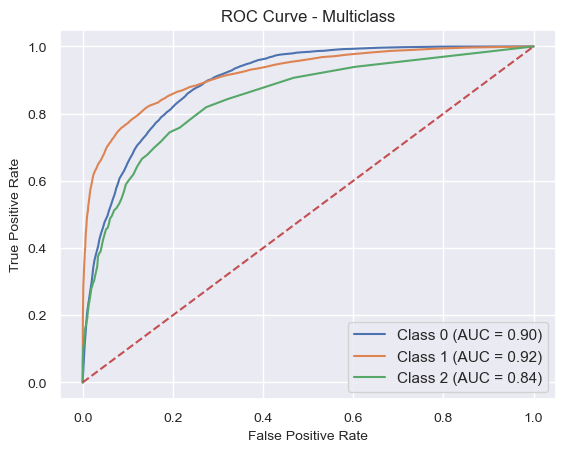

- AUC (macro): 0.72


C:\Users\Fran\.conda\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


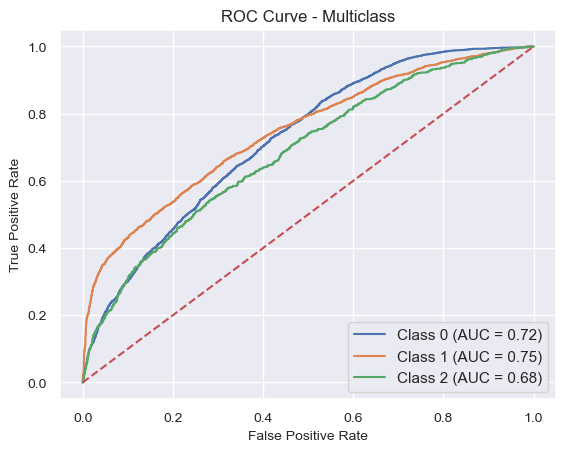

- AUC (macro): 0.73


C:\Users\Fran\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


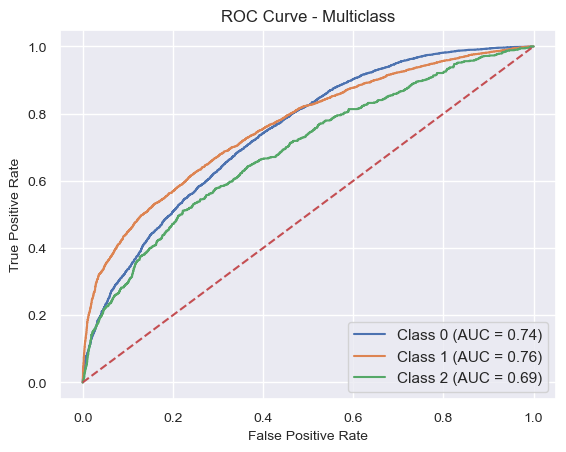

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

def saca_metricas(y_real, y_pred_proba, classes):
    y_real_bin = label_binarize(y_real, classes=classes)
    n_classes = y_real_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_real_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular AUC promedio (macro)
    roc_auc_macro = roc_auc_score(y_real_bin, y_pred_proba, average='macro')
    print(f'- AUC (macro): {roc_auc_macro:.2f}')

    # Graficar las curvas ROC para cada clase
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multiclass')
    plt.legend(loc='lower right')
    plt.show()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    train_cleaned.drop('status_group', axis=1),
    train_cleaned.status_group,
    test_size=0.2,
    random_state=0,
    stratify=train_cleaned.status_group
)

# Entrenar y evaluar el modelo de árbol de decisión
tree_mod = DecisionTreeClassifier(criterion="gini").fit(X_train, y_train)
tree_pred_proba = tree_mod.predict_proba(X_test)
saca_metricas(y_test, tree_pred_proba, classes=[0, 1, 2])

# Entrenar y evaluar el modelo de bosque aleatorio
classifier2 = RandomForestClassifier().fit(X_train, y_train)
pred2_proba = classifier2.predict_proba(X_test)
saca_metricas(y_test, pred2_proba, classes=[0, 1, 2])

# Entrenar y evaluar el modelo LinearSVC
classifier3 = LinearSVC(penalty='l1', dual=False).fit(X_train, y_train)
pred3_decision = classifier3.decision_function(X_test)
from scipy.special import softmax
pred3_proba = softmax(pred3_decision, axis=1)
saca_metricas(y_test, pred3_proba, classes=[0, 1, 2])

# Entrenar y evaluar el modelo LogisticRegression
classifier4 = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred4_proba = classifier4.predict_proba(X_test)
saca_metricas(y_test, pred4_proba, classes=[0, 1, 2])


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Define RandomForestClassifier
classifier2 = RandomForestClassifier()

# Realizar validación cruzada
cv = cross_val_score(
    classifier2,
    X_train, 
    y_train,
    scoring='roc_auc_ovo', 
    cv=5
)

print(cv)
print("CV ROC (media):", np.mean(cv))
print("CV ROC (desviación estándar):", np.std(cv))

# Ajustar classifier2 con todos los datos de entrenamiento
classifier2.fit(X_train, y_train)

# Calcular y mostrar las importancias de las características
imp = {}
for i in range(len(X_train.columns)):
    imp[X_train.columns[i]] = [classifier2.feature_importances_[i]]

# Mostrar las 10 características principales por importancia
top_features = pd.DataFrame.from_dict(imp, orient="index", columns=["Importancia"]).sort_values("Importancia", ascending=False).head(10)
top_features.style.background_gradient()



[0.87160865 0.87386408 0.85795465 0.86236074 0.87740752]
CV ROC (media): 0.868639129741956
CV ROC (desviación estándar): 0.007301769547195616


,Importancia
quantity,0.128269
longitude,0.123040
latitude,0.119366
construction_year,0.076605
gps_height,0.074234
day,0.055811
waterpoint_type,0.054575
extraction_type,0.045595
funder,0.041175
installer,0.032926


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    train_cleaned.drop('status_group', axis=1),
    train_cleaned.status_group,
    test_size=0.2,
    random_state=0,
    stratify=train_cleaned.status_group
)

# Definir el modelo RandomForestClassifier y los parámetros de la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [10, 50 ,100 ],
    'criterion': ['gini', 'entropy'],
    'max_depth': [16, 20],
    'max_features': ['log2', 'sqrt',None]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

model_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_kfold,
    n_jobs=-1
)

# Entrenar el modelo con GridSearchCV
model_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:")
print(model_grid.best_params_)
print("Mejor score encontrado (accuracy):")
print(model_grid.best_score_)

# Evaluar el modelo en el conjunto de prueba
tree_pred_proba = model_grid.predict_proba(X_test)

# Convertir las predicciones de probabilidad a etiquetas
tree_pred_labels = np.argmax(tree_pred_proba, axis=1)

# Mostrar métricas globales
accuracy = accuracy_score(y_test, tree_pred_labels)
precision = precision_score(y_test, tree_pred_labels, average='macro')
recall = recall_score(y_test, tree_pred_labels, average='macro')
f1 = f1_score(y_test, tree_pred_labels, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, tree_pred_labels))


Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}
Mejor score encontrado (accuracy):
0.8010439494405922
Accuracy: 0.80
Precision: 0.72
Recall: 0.64
F1-score: 0.66
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      5682
           1       0.84      0.74      0.79      3860
           2       0.53      0.25      0.34       708

    accuracy                           0.80     10250
   macro avg       0.72      0.64      0.66     10250
weighted avg       0.79      0.80      0.79     10250



In [112]:
classifier2 = RandomForestClassifier(criterion = 'gini', n_estimators= 100, max_depth = 20, max_features= 'sqrt').fit(X_train, y_train)
pred2 = classifier2.predict(X_test)


In [113]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      5682
           1       0.84      0.75      0.79      3860
           2       0.54      0.24      0.33       708

    accuracy                           0.80     10250
   macro avg       0.73      0.63      0.66     10250
weighted avg       0.80      0.80      0.79     10250



In [114]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '2': {}".format(sum(train_cleaned.status_group==2)))
print("Before OverSampling, counts of label '1': {}".format(sum(train_cleaned.status_group==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(train_cleaned.status_group==0)))

# Aplicar SMOTE para balancear las clases
sm = SMOTE(random_state=2)
train_cleaned_res, y_res = sm.fit_resample(train_cleaned.drop('status_group', axis=1), train_cleaned.status_group.ravel())

print('After OverSampling, the shape of train_X: {}'.format(train_cleaned_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_res==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))


Before OverSampling, counts of label '2': 3539
Before OverSampling, counts of label '1': 19298
Before OverSampling, counts of label '0': 28412
After OverSampling, the shape of train_X: (85236, 24)
After OverSampling, the shape of train_y: (85236,)
After OverSampling, counts of label '2': 28412
After OverSampling, counts of label '1': 28412
After OverSampling, counts of label '0': 28412


In [115]:
from sklearn.metrics import roc_curve, auc
import numpy as np

def saca_metricas(y_real, y_pred_proba, classes):
    n_classes = len(classes)
    y_real_bin = np.zeros((len(y_real), n_classes))
    for i, c in enumerate(classes):
        y_real_bin[:, i] = (y_real == c).astype(int)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_real_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute macro-average ROC AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    
    roc_auc_macro = auc(all_fpr, mean_tpr)
    
    # Print results
    for i in range(n_classes):
        print(f"Clase {classes[i]} - ROC AUC: {roc_auc[i]}")
    print(f"ROC AUC Promedio Macro: {roc_auc_macro}")


In [116]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split (train_cleaned_res, 
                                                     y_res,
                                                     test_size = 0.2,
                                                     random_state = 0,
                                                     stratify = y_res)

In [117]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

# Definición y entrenamiento del clasificador RandomForestClassifier
classifier5 = RandomForestClassifier(criterion='gini', n_estimators=500, max_depth=20, max_features='sqrt')
classifier5.fit(X_train_res, y_train_res)

# Validación cruzada para obtener predicciones de probabilidad
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
y_pred_cv = cross_val_predict(classifier5, train_cleaned_res, y_res, cv=skf, method='predict_proba')

# Predicciones en los datos de prueba
pred5 = classifier5.predict_proba(X_test_res)
pred_labels = np.argmax(pred5, axis=1) 
print("Classification Report en datos de prueba:")
print(classification_report(y_test_res, pred_labels))

# Evaluación usando la función saca_metricas en los datos de prueba
print("\nMétricas ROC AUC en datos de prueba:")
saca_metricas(y_test_res, pred5, classes=[0, 1, 2])

Classification Report en datos de prueba:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      5683
           1       0.87      0.80      0.83      5683
           2       0.86      0.95      0.90      5682

    accuracy                           0.86     17048
   macro avg       0.86      0.86      0.86     17048
weighted avg       0.86      0.86      0.86     17048


Métricas ROC AUC en datos de prueba:
Clase 0 - ROC AUC: 0.9512060073114998
Clase 1 - ROC AUC: 0.951165550438364
Clase 2 - ROC AUC: 0.9809235018785223
ROC AUC Promedio Macro: 0.961133692998321



# Análisis comparativo:

1. **Accuracy, Precision, Recall y F1-score (macro)**:
 - Los valores mejoran significativamente después de aplicar SMOTE. Eindicaiere que el balanceo de clases ha ayudado al modelo a predecir mejor las clases minoritarias (como la clase 2 en este caso), lo que se refleja en métricas más equilibradas y altas.

2. **ROC AUC**:
 - En el caso del ROC AUC, también vemos mejoras en los valores después del balanceo. Los valores altos de ROC AUC indican que el modelo es capaz de distinguir eficazmente entre las clases.

3. **Importancia del balanceo**:
 - El balanceo de datos ha permitido al modelo aprender de manera más equilibrada de todas las clases, evitando así el sesgo hacia las clases mayoritarias que podría ocurrir en datos desbConclusinos:

Basándosue en estoodemosltados, puedes concluir que el balanceo de datos ha llevado a una mejora signifrendimientoel ldimiento de tu modelo RandomForestClassifier. Los resultados en términos de métricas de clasificación y ROC AUC son más altos y más equilibrados después de aplicar SMOTE, lo que indica que el modelo está mejorando en la capacidad de generalización y en la precisión de las predicciones para todas las clases.


In [119]:
classifier5.feature_importances_

array([0.04462241, 0.06790051, 0.03649861, 0.11483131, 0.10315681,
       0.02593995, 0.02853173, 0.01682492, 0.03500414, 0.00612336,
       0.02111286, 0.01207471, 0.06351403, 0.05581014, 0.02083057,
       0.02072964, 0.03150336, 0.01112212, 0.10246199, 0.03618159,
       0.05032203, 0.05023259, 0.03249225, 0.01217838])

Text(0.5, 0, 'Random Forest Feature Importance')

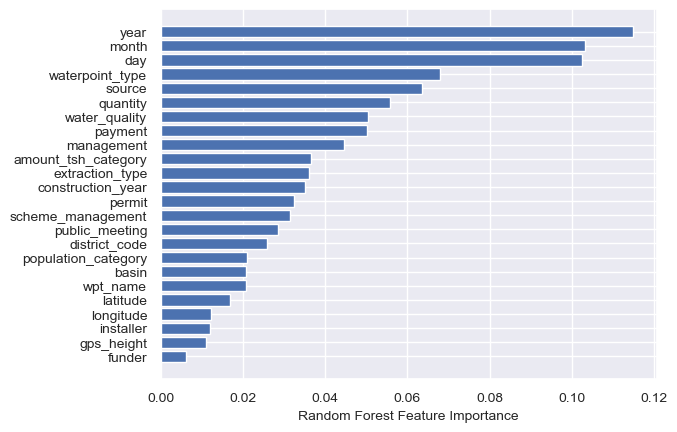

In [120]:
sorted_idx = classifier5.feature_importances_.argsort()
plt.barh(X_train_res.columns, classifier5.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

<Axes: >

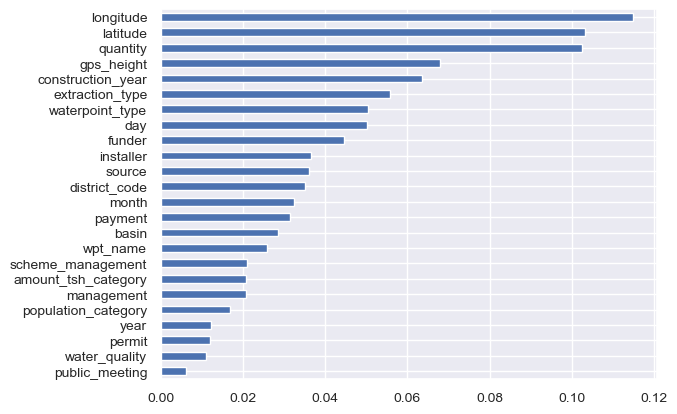

In [121]:
feat_importances = pd.Series(classifier5.feature_importances_, index=X_train_res.columns)
feat_importances.sort_values().plot(kind='barh')

# Pre proceso de limpieza para la data test
Se repiten las mismas modificaciones

In [122]:
test_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [123]:
test_values.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [124]:
# Convertir la columna 'date_recorded' a datetime
test_values['date_recorded'] = pd.to_datetime(test_values['date_recorded'], format='%Y-%m-%d')

# Extraer día, mes y año en columnas separadas
test_values['day'] = test_values['date_recorded'].dt.day
test_values['month'] = test_values['date_recorded'].dt.month
test_values['year'] = test_values['date_recorded'].dt.year

# Eliminar la columna original 'date_recorded' si ya no es necesaria
test_values.drop(columns='date_recorded', inplace=True)

In [125]:
cat_cols= test_values.select_dtypes(include=['object','category']).columns
num_cols = test_values.select_dtypes(exclude=['object','category']).columns

In [126]:
import pandas as pd
import numpy as np

# Supongamos que `test_values` es tu DataFrame con la columna 'funder'

# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = test_values['funder'].dropna().count()
proportions = test_values['funder'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = test_values['funder'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for funder, count in imputed_nulls.items():
    impute_values.extend([funder] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'funder'
null_indices = test_values['funder'][test_values['funder'].isnull()].index
test_values.loc[null_indices, 'funder'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(test_values['funder'].value_counts())


Total de valores nulos: 870
Proporciones de cada categoría:
funder
Government Of Tanzania    0.158441
Danida                    0.056724
Hesawa                    0.041488
World Bank                0.025179
Kkkt                      0.024034
                            ...   
Craelius                  0.000072
Tanroad                   0.000072
Ndanda Missions           0.000072
Wards                     0.000072
Livin                     0.000072
Name: count, Length: 979, dtype: float64
Cantidad imputada a cada categoría:
funder
Government Of Tanzania    226
Danida                     49
Hesawa                     36
World Bank                 22
Kkkt                       21
                         ... 
Craelius                    0
Tanroad                     0
Ndanda Missions             0
Wards                       0
Livin                       0
Name: count, Length: 979, dtype: int32
Valores imputados:
funder
Government Of Tanzania    2441
Danida                     842
Hesawa 

In [127]:
import pandas as pd
import numpy as np

# Supongamos que `test_values` es tu DataFrame original con la columna `funder`

# Calcular las frecuencias de las categorías
funder_counts = test_values['funder'].value_counts()

# Definir los tramos de frecuencia
rare_1_9 = funder_counts[funder_counts < 10].index
rare_10_49 = funder_counts[(funder_counts >= 10) & (funder_counts < 50)].index
rare_50_99 = funder_counts[(funder_counts >= 50) & (funder_counts < 100)].index

# Reemplazar las categorías según los tramos definidos
test_values['funder'] = test_values['funder'].apply(
    lambda x: 'Rare_1_9' if x in rare_1_9 else 
              ('Rare_10_49' if x in rare_10_49 else 
               ('Rare_50_99' if x in rare_50_99 else x))
)

# Mostrar los resultados
print(test_values['funder'].value_counts())


funder
Rare_10_49                2854
Government Of Tanzania    2441
Rare_50_99                1787
Rare_1_9                  1694
Danida                     842
Hesawa                     616
World Bank                 374
Kkkt                       357
Rwssp                      349
World Vision               336
Unicef                     284
Tasaf                      275
Dhv                        251
Private Individual         221
0                          216
Dwsp                       214
District Council           206
Norad                      195
Water                      166
Germany Republi            165
Ministry Of Water          147
Tcrs                       141
Hifab                      135
Netherlands                130
Dwe                        129
Lga                        110
Adb                        109
Amref                      106
Name: count, dtype: int64


In [128]:
import pandas as pd
import numpy as np


# Calcular las proporciones de cada categoría sobre el total de observaciones no nulas
total_non_null = test_values['installer'].dropna().count()
proportions = test_values['installer'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = test_values['installer'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for installer, count in imputed_nulls.items():
    impute_values.extend([installer] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'installer'
null_indices = test_values['installer'][test_values['installer'].isnull()].index
test_values.loc[null_indices, 'installer'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(test_values['installer'].value_counts())


Total de valores nulos: 877
Proporciones de cada categoría:
installer
DWE           0.311243
Government    0.032706
RWE           0.020897
Commu         0.020540
DANIDA        0.018249
                ...   
Commun        0.000072
QUIKWIN       0.000072
SDG           0.000072
MoWI          0.000072
LIVI          0.000072
Name: count, Length: 1091, dtype: float64
Cantidad imputada a cada categoría:
installer
DWE           352
Government     29
RWE            18
Commu          18
DANIDA         16
             ... 
Commun          0
QUIKWIN         0
SDG             0
MoWI            0
LIVI            0
Name: count, Length: 1091, dtype: int32
Valores imputados:
installer
DWE           4701
Government     486
RWE            310
Commu          305
DANIDA         271
              ... 
Commun           1
QUIKWIN          1
SDG              1
MoWI             1
LIVI             1
Name: count, Length: 1091, dtype: int64


In [129]:
import pandas as pd

# Supongamos que `test_values` es tu DataFrame original con la columna `installer`

# Calcular las frecuencias de las categorías
installer_counts = test_values['installer'].value_counts()

# Definir los tramos de frecuencia
rare_menor_5 = installer_counts[installer_counts < 5].index
rare_5_20 = installer_counts[(installer_counts >= 5) & (installer_counts <= 20)].index
rare_menor_50_mayor_20 = installer_counts[(installer_counts > 20) & (installer_counts < 50)].index
rare_50_100 = installer_counts[(installer_counts >= 50) & (installer_counts <= 100)].index
rare_101_150 = installer_counts[(installer_counts > 100) & (installer_counts <= 150)].index
rare_151_200 = installer_counts[(installer_counts > 150) & (installer_counts <= 200)].index
rare_201_500 = installer_counts[(installer_counts > 200) & (installer_counts <= 500)].index

# Reemplazar las categorías según los tramos definidos
test_values['installer'] = test_values['installer'].apply(
    lambda x: 'Rare_menor_5' if x in rare_menor_5 else 
              ('Rare_5_20' if x in rare_5_20 else 
               ('Rare_menor_50_mayor_20' if x in rare_menor_50_mayor_20 else 
                ('Rare_50_100' if x in rare_50_100 else 
                 ('Rare_101_150' if x in rare_101_150 else 
                  ('Rare_151_200' if x in rare_151_200 else 
                   ('Rare_201_500' if x in rare_201_500 else x))))))
)

# Mostrar los resultados
print(test_values['installer'].value_counts())


installer
DWE                       4701
Rare_201_500              2068
Rare_menor_50_mayor_20    2027
Rare_5_20                 1748
Rare_50_100               1434
Rare_menor_5              1262
Rare_101_150              1103
Rare_151_200               507
Name: count, dtype: int64


In [130]:
import pandas as pd
import numpy as np

# Supongamos que `test_values` es tu DataFrame original con la columna `subvillage`

# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = test_values['subvillage'].dropna().count()
proportions = test_values['subvillage'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = test_values['subvillage'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for subvillage, count in imputed_nulls.items():
    impute_values.extend([subvillage] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'subvillage'
null_indices = test_values['subvillage'][test_values['subvillage'].isnull()].index
test_values.loc[null_indices, 'subvillage'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(test_values['subvillage'].value_counts())


Total de valores nulos: 99
Proporciones de cada categoría:
subvillage
Shuleni           0.009491
Majengo           0.008745
Madukani          0.008203
Kati              0.006372
Sokoni            0.004203
                    ...   
Kurukangara       0.000068
Kiranjeranje A    0.000068
Mwajiji           0.000068
Ngabobo           0.000068
Kamba             0.000068
Name: count, Length: 8443, dtype: float64
Cantidad imputada a cada categoría:
subvillage
Shuleni           96
Majengo            1
Madukani           1
Kati               1
Sokoni             0
                  ..
Kurukangara        0
Kiranjeranje A     0
Mwajiji            0
Ngabobo            0
Kamba              0
Name: count, Length: 8443, dtype: int32
Valores imputados:
subvillage
Shuleni           236
Majengo           130
Madukani          122
Kati               95
Sokoni             62
                 ... 
Kurukangara         1
Kiranjeranje A      1
Mwajiji             1
Ngabobo             1
Kamba               1
N

In [131]:
import pandas as pd
import numpy as np

# Supongamos que `test_values` es tu DataFrame original con la columna `subvillage`

# Calcular las frecuencias de las categorías
subvillage_counts = test_values['subvillage'].value_counts()

# Definir los tramos de frecuencia
rare_1 = subvillage_counts[subvillage_counts == 1].index
rare_2_4 = subvillage_counts[(subvillage_counts > 1) & (subvillage_counts < 5)].index
rare_5_10 = subvillage_counts[(subvillage_counts >= 5) & (subvillage_counts <= 10)].index
rare_11_20 = subvillage_counts[(subvillage_counts >= 11) & (subvillage_counts <= 20)].index
rare_21_50 = subvillage_counts[(subvillage_counts >= 21) & (subvillage_counts <= 50)].index
rare_51_100 = subvillage_counts[(subvillage_counts >= 51) & (subvillage_counts <= 100)].index
rare_101_plus = subvillage_counts[subvillage_counts > 100].index

# Reemplazar las categorías según los tramos definidos
test_values['subvillage'] = test_values['subvillage'].apply(
    lambda x: 'Rare_1' if x in rare_1 else 
              ('Rare_2_4' if x in rare_2_4 else 
               ('Rare_5_10' if x in rare_5_10 else 
                ('Rare_11_20' if x in rare_11_20 else 
                 ('Rare_21_50' if x in rare_21_50 else 
                  ('Rare_51_100' if x in rare_51_100 else 
                   ('Rare_101_plus' if x in rare_101_plus else x))))))
)

# Mostrar los resultados
print(test_values['subvillage'].value_counts())


subvillage
Rare_1           5964
Rare_2_4         5146
Rare_5_10        1596
Rare_11_20        734
Rare_21_50        649
Rare_101_plus     488
Rare_51_100       273
Name: count, dtype: int64


In [132]:
# Paso 1: Convertir "none" a NaN
test_values['wpt_name'] = test_values['wpt_name'].replace('none', np.nan)

# Paso 2: Contar valores nulos
total_nulls1 = test_values['wpt_name'].isnull().sum()
print(total_nulls1)

877


In [133]:
test_values

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,day,month,year
0,50785,0.0,Rare_50_99,1996,Rare_menor_50_mayor_20,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,4,2,2013
1,51630,0.0,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,4,2,2013
2,17168,0.0,Government Of Tanzania,1567,DWE,34.767863,-5.004344,Puma Secondary,0,Internal,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,1,2,2013
3,45559,0.0,Rare_1_9,267,Rare_5_20,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,dry,dry,shallow well,shallow well,groundwater,other,other,22,1,2013
4,49871,500.0,Rare_10_49,1260,Rare_5_20,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,27,3,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,Danida,34,Rare_50_100,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,24,2,2011
14846,18990,1000.0,Rare_1_9,0,Rare_menor_5,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,21,3,2011
14847,28749,0.0,Rare_10_49,1476,Rare_5_20,34.739804,-4.585587,Bwawani,0,Internal,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,4,3,2013
14848,33492,0.0,Rare_10_49,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,...,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,18,2,2013


In [134]:
import pandas as pd
import numpy as np

# Supongamos que `test_values` es tu DataFrame original con la columna `wpt_name`

# Calcular las proporciones de cada categoría sobre el total de observaciones no nulas
total_non_null = test_values['wpt_name'].dropna().count()
proportions = test_values['wpt_name'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = test_values['wpt_name'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for wpt_name, count in imputed_nulls.items():
    impute_values.extend([wpt_name] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'wpt_name'
null_indices = test_values['wpt_name'][test_values['wpt_name'].isnull()].index
test_values.loc[null_indices, 'wpt_name'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(test_values['wpt_name'].value_counts())


Total de valores nulos: 877
Proporciones de cada categoría:
wpt_name
Shuleni             0.031131
Zahanati            0.014600
Msikitini           0.008015
Sokoni              0.004867
Kanisani            0.004795
                      ...   
Kwa Gadau           0.000072
Bubinza B           0.000072
Nguvu Kazi A        0.000072
Kwa Everigist       0.000072
Kwa Mzee Chagala    0.000072
Name: count, Length: 10839, dtype: float64
Cantidad imputada a cada categoría:
wpt_name
Shuleni             765
Zahanati             13
Msikitini             7
Sokoni                4
Kanisani              4
                   ... 
Kwa Gadau             0
Bubinza B             0
Nguvu Kazi A          0
Kwa Everigist         0
Kwa Mzee Chagala      0
Name: count, Length: 10839, dtype: int32
Valores imputados:
wpt_name
Shuleni             1200
Zahanati             217
Msikitini            119
Sokoni                72
Kanisani              71
                    ... 
Kwa Gadau              1
Bubinza B       

In [135]:
import pandas as pd

# Supongamos que `test_values` es tu DataFrame original con la columna `wpt_name`

# Obtener la distribución de la columna 'wpt_name'
wpt_name_counts = test_values['wpt_name'].value_counts()

# Definir los tramos de frecuencia
rare_1 = wpt_name_counts[wpt_name_counts == 1].index
rare_2_30 = wpt_name_counts[(wpt_name_counts > 1) & (wpt_name_counts <= 30)].index
rare_31_100 = wpt_name_counts[(wpt_name_counts > 30) & (wpt_name_counts <= 100)].index
rare_101_500 = wpt_name_counts[(wpt_name_counts > 100) & (wpt_name_counts <= 500)].index

# Reemplazar las categorías según los tramos definidos
test_values['wpt_name'] = test_values['wpt_name'].apply(
    lambda x: 'Rare_1' if x in rare_1 else
              ('Rare_2_30' if x in rare_2_30 else
               ('Rare_31_100' if x in rare_31_100 else
                ('Rare_101_500' if x in rare_101_500 else x))
    )
)

# Mostrar los resultados
print(test_values['wpt_name'].value_counts())


wpt_name
Rare_1          10046
Rare_2_30        2743
Shuleni          1200
Rare_31_100       525
Rare_101_500      336
Name: count, dtype: int64


In [136]:
# Obtener la distribución de la columna 'public_meeting'
public_meeting_counts = test_values['public_meeting'].value_counts()

print(public_meeting_counts)


public_meeting
True     12738
False     1291
Name: count, dtype: int64


In [137]:
# Obtener la distribución de la columna 'public_meeting'
public_meeting_counts = test_values['public_meeting'].value_counts()

# Crear una copia para evitar modificar los datos originales
public_meeting_counts_modified = public_meeting_counts.copy()

# Reemplazar True por 1 y False por 0 en la copia
public_meeting_counts_modified.index = public_meeting_counts_modified.index.map({True: 1, False: 0}.get)

# Mostrar los resultados
print(public_meeting_counts_modified)


public_meeting
1    12738
0     1291
Name: count, dtype: int64


In [138]:
# Contar valores nulos
total_nulls_public_meeting = test_values['public_meeting'].isnull().sum()
print(total_nulls_public_meeting)


821


In [139]:
# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = test_values['public_meeting'].dropna().count()
proportions = test_values['public_meeting'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = test_values['public_meeting'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for public_meeting, count in imputed_nulls.items():
    impute_values.extend([public_meeting] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'public_meeting'
null_indices = test_values['public_meeting'][test_values['public_meeting'].isnull()].index
test_values.loc[null_indices, 'public_meeting'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(test_values['public_meeting'].value_counts())


Total de valores nulos: 821
Proporciones de cada categoría:
public_meeting
True     0.907976
False    0.092024
Name: count, dtype: float64
Cantidad imputada a cada categoría:
public_meeting
True     745
False     76
Name: count, dtype: int32
Valores imputados:
public_meeting
True     13483
False     1367
Name: count, dtype: int64


In [140]:
import numpy as np

# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = test_values['scheme_management'].dropna().count()
proportions = test_values['scheme_management'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = test_values['scheme_management'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for scheme_management, count in imputed_nulls.items():
    impute_values.extend([scheme_management] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'scheme_management'
null_indices = test_values['scheme_management'][test_values['scheme_management'].isnull()].index
test_values.loc[null_indices, 'scheme_management'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(test_values['scheme_management'].value_counts())


Total de valores nulos: 969
Proporciones de cada categoría:
scheme_management
VWC                 0.657301
WUG                 0.092933
Water authority     0.059218
Water Board         0.051437
WUA                 0.048123
Parastatal          0.031986
Company             0.020171
Private operator    0.018947
Other               0.016569
SWC                 0.001873
Trust               0.001441
Name: count, dtype: float64
Cantidad imputada a cada categoría:
scheme_management
VWC                 637
WUG                  90
Water authority      57
Water Board          50
WUA                  47
Parastatal           31
Company              20
Private operator     18
Other                16
SWC                   2
Trust                 1
Name: count, dtype: int32
Valores imputados:
scheme_management
VWC                 9761
WUG                 1380
Water authority      879
Water Board          764
WUA                  715
Parastatal           475
Company              300
Private operator   

In [141]:
import numpy as np

# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = test_values['scheme_name'].dropna().count()
proportions = test_values['scheme_name'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = test_values['scheme_name'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for scheme_name, count in imputed_nulls.items():
    impute_values.extend([scheme_name] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'scheme_name'
null_indices = test_values['scheme_name'][test_values['scheme_name'].isnull()].index
test_values.loc[null_indices, 'scheme_name'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(test_values['scheme_name'].value_counts())


Total de valores nulos: 7242
Proporciones de cada categoría:
scheme_name
K                      0.023134
Borehole               0.020768
DANIDA                 0.013670
Chalinze wate          0.012618
M                      0.011830
                         ...   
Iseke water supply     0.000131
Dina                   0.000131
Water supplying        0.000131
Mazi                   0.000131
Mbwasa water supply    0.000131
Name: count, Length: 1788, dtype: float64
Cantidad imputada a cada categoría:
scheme_name
K                      168
Borehole               150
DANIDA                  99
Chalinze wate           91
M                       86
                      ... 
Iseke water supply       1
Dina                     1
Water supplying          1
Mazi                     1
Mbwasa water supply      1
Name: count, Length: 1788, dtype: int32
Valores imputados:
scheme_name
K                      344
Borehole               308
DANIDA                 203
Chalinze wate          187
M        

In [142]:
# Obtener la distribución de la columna 'scheme_name'
scheme_name_counts = test_values['scheme_name'].value_counts()

# Definir los tramos de frecuencia
rare_less_3 = scheme_name_counts[scheme_name_counts < 3].index
rare_3_7 = scheme_name_counts[(scheme_name_counts >= 3) & (scheme_name_counts <= 7)].index
rare_8_12 = scheme_name_counts[(scheme_name_counts >= 8) & (scheme_name_counts <= 12)].index
rare_13_16 = scheme_name_counts[(scheme_name_counts >= 13) & (scheme_name_counts <= 16)].index
rare_17_20 = scheme_name_counts[(scheme_name_counts >= 17) & (scheme_name_counts <= 20)].index
rare_21_25 = scheme_name_counts[(scheme_name_counts >= 21) & (scheme_name_counts <= 25)].index
rare_26_30 = scheme_name_counts[(scheme_name_counts >= 26) & (scheme_name_counts <= 30)].index
rare_31_35 = scheme_name_counts[(scheme_name_counts >= 31) & (scheme_name_counts <= 35)].index
rare_36_40 = scheme_name_counts[(scheme_name_counts >= 36) & (scheme_name_counts <= 40)].index
rare_41_45 = scheme_name_counts[(scheme_name_counts >= 41) & (scheme_name_counts <= 45)].index
rare_46_50 = scheme_name_counts[(scheme_name_counts >= 46) & (scheme_name_counts <= 50)].index
rare_51_55 = scheme_name_counts[(scheme_name_counts >= 51) & (scheme_name_counts <= 55)].index
rare_56_64 = scheme_name_counts[(scheme_name_counts >= 56) & (scheme_name_counts <= 64)].index
rare_65_70 = scheme_name_counts[(scheme_name_counts >= 65) & (scheme_name_counts <= 70)].index
rare_71_80 = scheme_name_counts[(scheme_name_counts >= 71) & (scheme_name_counts <= 80)].index
rare_81_90 = scheme_name_counts[(scheme_name_counts >= 81) & (scheme_name_counts <= 90)].index
rare_91_100 = scheme_name_counts[(scheme_name_counts >= 91) & (scheme_name_counts <= 100)].index
rare_101_120 = scheme_name_counts[(scheme_name_counts >= 101) & (scheme_name_counts <= 120)].index
rare_121_140 = scheme_name_counts[(scheme_name_counts >= 121) & (scheme_name_counts <= 140)].index
rare_141_160 = scheme_name_counts[(scheme_name_counts >= 141) & (scheme_name_counts <= 160)].index
rare_161_180 = scheme_name_counts[(scheme_name_counts >= 161) & (scheme_name_counts <= 180)].index
rare_181_200 = scheme_name_counts[(scheme_name_counts >= 181) & (scheme_name_counts <= 200)].index

# Reemplazar las categorías según los tramos definidos
test_values['scheme_name'] = test_values['scheme_name'].apply(lambda x: 
    'Rare_less_3' if x in rare_less_3 else
    'Rare_3_7' if x in rare_3_7 else
    'Rare_8_12' if x in rare_8_12 else
    'Rare_13_16' if x in rare_13_16 else
    'Rare_17_20' if x in rare_17_20 else
    'Rare_21_25' if x in rare_21_25 else
    'Rare_26_30' if x in rare_26_30 else
    'Rare_31_35' if x in rare_31_35 else
    'Rare_36_40' if x in rare_36_40 else
    'Rare_41_45' if x in rare_41_45 else
    'Rare_46_50' if x in rare_46_50 else
    'Rare_51_55' if x in rare_51_55 else
    'Rare_56_64' if x in rare_56_64 else
    'Rare_65_70' if x in rare_65_70 else
    'Rare_71_80' if x in rare_71_80 else
    'Rare_81_90' if x in rare_81_90 else
    'Rare_91_100' if x in rare_91_100 else
    'Rare_101_120' if x in rare_101_120 else
    'Rare_121_140' if x in rare_121_140 else
    'Rare_141_160' if x in rare_141_160 else
    'Rare_161_180' if x in rare_161_180 else
    'Rare_181_200' if x in rare_181_200 else
    x
)

# Mostrar los resultados
print(test_values['scheme_name'].value_counts())


scheme_name
Rare_8_12       3082
Rare_3_7        2556
Rare_13_16      1340
Rare_less_3     1149
Rare_21_25      1018
Rare_17_20       778
Rare_56_64       551
Rare_31_35       526
Rare_101_120     418
Rare_121_140     379
Rare_26_30       361
K                344
Borehole         308
Rare_36_40       304
Rare_41_45       260
Rare_81_90       256
DANIDA           203
Rare_181_200     187
Rare_161_180     176
Rare_141_160     146
Rare_65_70       132
Rare_51_55       106
Rare_91_100       98
Rare_46_50        94
Rare_71_80        78
Name: count, dtype: int64


In [143]:
# Obtener la distribución de la columna 'permit'
permit_counts = test_values['permit'].value_counts()

# Crear una copia para evitar modificar los datos originales
permit_counts_modified = permit_counts.copy()

# Reemplazar True por 1 y False por 0 en la copia
permit_counts_modified.index = permit_counts_modified.index.map({True: 1, False: 0}.get)

# Mostrar los resultados
print(permit_counts_modified)


permit
1    9754
0    4359
Name: count, dtype: int64


In [144]:
import numpy as np

# Calcular la proporción de cada categoría sobre el total de observaciones no nulas
total_non_null = test_values['permit'].dropna().count()
proportions = test_values['permit'].value_counts() / total_non_null

# Obtener la cantidad de valores nulos
total_nulls = test_values['permit'].isnull().sum()

# Multiplicar las proporciones por el total de valores nulos
imputed_nulls = np.round(proportions * total_nulls).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores nulos
imputed_nulls_delta = total_nulls - imputed_nulls.sum()
if imputed_nulls_delta > 0:
    first_non_zero_idx = imputed_nulls[imputed_nulls > 0].index[0]
    imputed_nulls[first_non_zero_idx] += imputed_nulls_delta

# Crear una lista con las categorías según las cantidades calculadas
impute_values = []
for permit, count in imputed_nulls.items():
    impute_values.extend([permit] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_nulls:
    impute_values = impute_values[:total_nulls]
elif len(impute_values) < total_nulls:
    additional_values = np.random.choice(proportions.index, size=total_nulls - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores nulos en la columna 'permit' de test_values
null_indices = test_values['permit'][test_values['permit'].isnull()].index
test_values.loc[null_indices, 'permit'] = impute_values

# Mostrar los resultados
print("Total de valores nulos:", total_nulls)
print("Proporciones de cada categoría:")
print(proportions)
print("Cantidad imputada a cada categoría:")
print(imputed_nulls)
print("Valores imputados:")
print(test_values['permit'].value_counts())


Total de valores nulos: 737
Proporciones de cada categoría:
permit
True     0.691136
False    0.308864
Name: count, dtype: float64
Cantidad imputada a cada categoría:
permit
True     509
False    228
Name: count, dtype: int32
Valores imputados:
permit
True     10263
False     4587
Name: count, dtype: int64


In [145]:
import pandas as pd
import numpy as np

# Calcular la proporción de cada año de construcción sobre el total de observaciones no nulas
total_non_zero = test_values['construction_year'].loc[test_values['construction_year'] != 0].count()
proportions = test_values['construction_year'].loc[test_values['construction_year'] != 0].value_counts() / total_non_zero

# Obtener la cantidad de valores 0
total_zeros = (test_values['construction_year'] == 0).sum()

# Multiplicar las proporciones por el total de valores 0
imputed_zeros = np.round(proportions * total_zeros).astype(int)

# Ajustar para asegurar que la suma sea igual al total de valores 0
imputed_zeros_delta = total_zeros - imputed_zeros.sum()
if imputed_zeros_delta > 0:
    first_non_zero_idx = imputed_zeros[imputed_zeros > 0].index[0]
    imputed_zeros[first_non_zero_idx] += imputed_zeros_delta

# Crear una lista con los años según las cantidades calculadas
impute_values = []
for year, count in imputed_zeros.items():
    impute_values.extend([year] * count)

# Si hay una discrepancia, ajustar la lista impute_values
if len(impute_values) > total_zeros:
    impute_values = impute_values[:total_zeros]
elif len(impute_values) < total_zeros:
    additional_values = np.random.choice(proportions.index, size=total_zeros - len(impute_values), p=proportions.values)
    impute_values.extend(additional_values)

# Reemplazar los valores 0 en la columna 'construction_year' de test_values
zero_indices = test_values['construction_year'][test_values['construction_year'] == 0].index
test_values.loc[zero_indices, 'construction_year'] = impute_values

# Mostrar los resultados
print("Total de valores 0:", total_zeros)
print("Proporciones de cada año:")
print(proportions)
print("Cantidad imputada a cada año:")
print(imputed_zeros)
print("Valores imputados:")
print(test_values['construction_year'].value_counts().sort_index())


Total de valores 0: 5260
Proporciones de cada año:
construction_year
2010    0.069760
2009    0.069135
2008    0.065693
2000    0.050782
2006    0.043900
2007    0.038895
2011    0.034932
2004    0.030657
2003    0.030553
1995    0.028050
2002    0.027946
2005    0.027529
2012    0.027424
1999    0.025339
1985    0.024192
1978    0.023983
1998    0.023358
1990    0.023149
1996    0.021794
1994    0.021064
1980    0.020229
1984    0.019917
1972    0.019187
1982    0.018978
1997    0.018457
1992    0.017414
2001    0.014599
1974    0.014390
1993    0.014286
1988    0.014181
1975    0.012930
1986    0.012409
1976    0.011575
1983    0.011053
1991    0.008655
1970    0.008551
1989    0.008342
1987    0.007091
1981    0.005527
1979    0.005527
1977    0.004692
1973    0.004484
2013    0.003441
1971    0.003337
1960    0.002294
1963    0.002294
1969    0.001877
1967    0.001877
1968    0.001668
1964    0.000834
1961    0.000730
1962    0.000626
1965    0.000209
1966    0.000209
Name: count, 

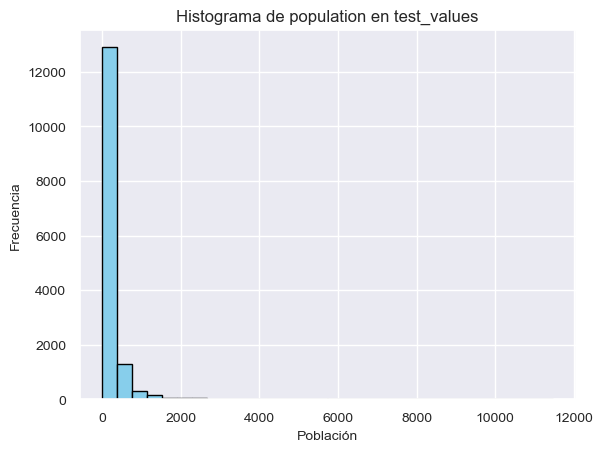

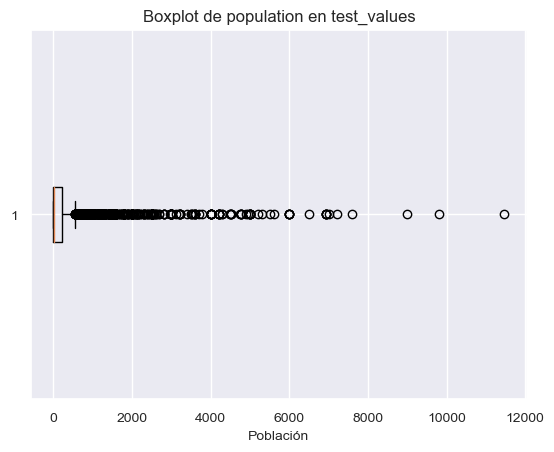

count    14850.000000
mean       184.114209
std        469.499332
min          0.000000
25%          0.000000
50%         20.000000
75%        220.000000
max      11469.000000
Name: population, dtype: float64
Low threshold: 0.0
Medium threshold: 220.0
population_category
Medium population    5694
No population        5453
High population      3703
Name: count, dtype: int64


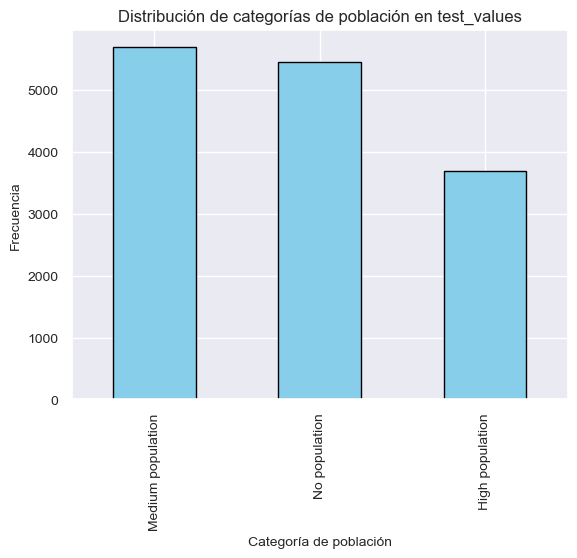

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualizar la distribución de population en test_values
plt.hist(test_values['population'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de population en test_values')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para visualizar outliers en test_values
plt.boxplot(test_values['population'], vert=False)
plt.title('Boxplot de population en test_values')
plt.xlabel('Población')
plt.show()

# Ver las estadísticas descriptivas de population en test_values
print(test_values['population'].describe())

# Definir los umbrales basados en cuantiles
low_threshold = test_values['population'].quantile(0.25)
medium_threshold = test_values['population'].quantile(0.75)

print(f'Low threshold: {low_threshold}')
print(f'Medium threshold: {medium_threshold}')

# Función para convertir la población en categorías
def categorize_population(pop):
    if pop == 0:
        return 'No population'
    elif pop <= low_threshold:
        return 'Low population'
    elif pop <= medium_threshold:
        return 'Medium population'
    else:
        return 'High population'

# Aplicar la función al DataFrame test_values
test_values['population_category'] = test_values['population'].apply(categorize_population)

# Verificar la nueva columna en test_values
print(test_values['population_category'].value_counts())

# Visualizar la distribución de la nueva variable categórica en test_values
test_values['population_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de categorías de población en test_values')
plt.xlabel('Categoría de población')
plt.ylabel('Frecuencia')
plt.show()


In [147]:
test_values.drop('population', axis=1, inplace=True)


In [148]:
import pandas as pd

# Definir la función para categorizar amount_tsh
def categorize_amount_tsh(amount):
    if amount == 0:
        return 'No water point'
    elif amount <= 50:
        return 'Low water availability'
    elif amount <= 500:
        return 'Medium water availability'
    else:
        return 'High water availability'

# Aplicar la función al DataFrame test_values para crear una nueva columna categorizada
test_values['amount_tsh_category'] = test_values['amount_tsh'].apply(categorize_amount_tsh)

# Eliminar la columna original amount_tsh en test_values
test_values.drop('amount_tsh', axis=1, inplace=True)

# Verificar que la columna original haya sido eliminada en test_values
print(test_values.head())


      id                  funder  gps_height               installer  \
0  50785              Rare_50_99        1996  Rare_menor_50_mayor_20   
1  51630  Government Of Tanzania        1569                     DWE   
2  17168  Government Of Tanzania        1567                     DWE   
3  45559                Rare_1_9         267               Rare_5_20   
4  49871              Rare_10_49        1260               Rare_5_20   

   longitude   latitude wpt_name  num_private                    basin  \
0  35.290799  -4.059696   Rare_1            0                 Internal   
1  36.656709  -3.309214   Rare_1            0                  Pangani   
2  34.767863  -5.004344   Rare_1            0                 Internal   
3  38.058046  -9.418672   Rare_1            0  Ruvuma / Southern Coast   
4  35.006123 -10.950412   Rare_1            0  Ruvuma / Southern Coast   

  subvillage  ...                source           source_type  source_class  \
0   Rare_2_4  ...  rainwater harvesting  ra

In [149]:
test_values

,id,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,source,source_type,source_class,waterpoint_type,waterpoint_type_group,day,month,year,population_category,amount_tsh_category
0,50785,Rare_50_99,1996,Rare_menor_50_mayor_20,35.290799,-4.059696,Rare_1,0,Internal,Rare_2_4,...,rainwater harvesting,rainwater harvesting,surface,other,other,4,2,2013,High population,No water point
1,51630,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Rare_1,0,Pangani,Rare_1,...,spring,spring,groundwater,communal standpipe,communal standpipe,4,2,2013,High population,No water point
2,17168,Government Of Tanzania,1567,DWE,34.767863,-5.004344,Rare_1,0,Internal,Rare_1,...,rainwater harvesting,rainwater harvesting,surface,other,other,1,2,2013,High population,No water point
3,45559,Rare_1_9,267,Rare_5_20,38.058046,-9.418672,Rare_1,0,Ruvuma / Southern Coast,Rare_2_4,...,shallow well,shallow well,groundwater,other,other,22,1,2013,High population,No water point
4,49871,Rare_10_49,1260,Rare_5_20,35.006123,-10.950412,Rare_1,0,Ruvuma / Southern Coast,Rare_2_4,...,spring,spring,groundwater,communal standpipe,communal standpipe,27,3,2013,Medium population,Medium water availability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,Danida,34,Rare_50_100,38.852669,-6.582841,Rare_1,0,Wami / Ruvu,Rare_2_4,...,river,river/lake,surface,communal standpipe,communal standpipe,24,2,2011,Medium population,No water point
14846,18990,Rare_1_9,0,Rare_menor_5,37.451633,-5.350428,Rare_1,0,Pangani,Rare_2_4,...,shallow well,shallow well,groundwater,hand pump,hand pump,21,3,2011,High population,High water availability
14847,28749,Rare_10_49,1476,Rare_5_20,34.739804,-4.585587,Rare_2_30,0,Internal,Rare_5_10,...,dam,dam,surface,communal standpipe,communal standpipe,4,3,2013,Medium population,No water point
14848,33492,Rare_10_49,998,DWE,35.432732,-10.584159,Rare_2_30,0,Lake Nyasa,Rare_2_4,...,river,river/lake,surface,communal standpipe,communal standpipe,18,2,2013,Medium population,No water point


In [150]:
variables_dummies = ['funder','installer','basin','wpt_name','basin','subvillage','region','lga','ward','scheme_management','recorded_by','scheme_name','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type','waterpoint_type_group','status_group','population_category','amount_tsh_category','public_meeting','permit']

In [151]:
import pickle
import pandas as pd


# Nombre del archivo donde se guardó el diccionario mapeo_inverso
nombre_archivo = 'mapeo_inverso.pkl'

# Lista de variables categóricas donde aplicar el mapeo inverso
variables_categoricas = ['funder', 'installer', 'basin', 'wpt_name', 'subvillage', 'region', 
                         'lga', 'ward', 'scheme_management', 'recorded_by', 'scheme_name',
                         'extraction_type', 'extraction_type_group', 'extraction_type_class',
                         'management', 'management_group', 'payment', 'payment_type',
                         'water_quality', 'quality_group', 'quantity', 'quantity_group',
                         'source', 'source_type', 'source_class', 'waterpoint_type',
                         'waterpoint_type_group', 'population_category', 'amount_tsh_category',
                         'public_meeting', 'permit']

# Iterar sobre las variables categóricas y aplicar el mapeo inverso para test_values
for var in variables_categoricas:
    # Cargar el diccionario mapeo_inverso desde el archivo guardado
    with open(nombre_archivo, 'rb') as f:
        mapeo_inverso_train = pickle.load(f)
    
    # Aplicar el mapeo inverso para test_values
    if var in mapeo_inverso_train:
        mapeo = mapeo_inverso_train[var]
        mapeo_nan = {v: k for k, v in mapeo.items()}  # Mapeo con NaN manejados
        test_values.loc[:, var] = test_values[var].map(mapeo_nan).fillna('Desconocido')  # Asignar 'Desconocido' a NaN
    else:
        print(f"El diccionario mapeo_inverso no contiene la clave '{var}'")

# Verificar el resultado para test_values después de aplicar el mapeo inverso
print(test_values.head())



      id funder  gps_height installer  longitude   latitude wpt_name  \
0  50785      2        1996         2  35.290799  -4.059696        4   
1  51630     16        1569         5  36.656709  -3.309214        4   
2  17168     16        1567         5  34.767863  -5.004344        4   
3  45559      3         267         8  38.058046  -9.418672        4   
4  49871      7        1260         8  35.006123 -10.950412        4   

   num_private basin subvillage  ... source  source_type  source_class  \
0            0     4          3  ...      2            2             2   
1            0     3          4  ...      1            1             1   
2            0     4          4  ...      2            2             2   
3            0     9          3  ...      5            5             1   
4            0     9          3  ...      1            1             1   

  waterpoint_type waterpoint_type_group day month  year population_category  \
0               4                     3   4

In [152]:
test_values.set_index('id', inplace=True)

In [153]:
# Lista de columnas que deseas conservar
columnas_deseadas = ['funder', 'gps_height', 'installer', 'longitude', 'latitude',
                     'wpt_name', 'basin', 'population_category', 'district_code', 'public_meeting', 
                     'scheme_management', 'permit', 'construction_year', 'extraction_type', 
                     'amount_tsh_category', 'management', 'payment', 'water_quality', 'quantity', 
                     'source', 'waterpoint_type', 'day', 'month', 'year']

# Seleccionar solo las columnas deseadas en tu DataFrame test_values
test_values = test_values.loc[:, columnas_deseadas]

# Verificar que se hayan seleccionado correctamente las columnas
print(test_values.head())


      funder  gps_height installer  longitude   latitude wpt_name basin  \
id                                                                        
50785      2        1996         2  35.290799  -4.059696        4     4   
51630     16        1569         5  36.656709  -3.309214        4     3   
17168     16        1567         5  34.767863  -5.004344        4     4   
45559      3         267         8  38.058046  -9.418672        4     9   
49871      7        1260         8  35.006123 -10.950412        4     9   

      population_category  district_code public_meeting  ...  \
id                                                       ...   
50785                   2              3              1  ...   
51630                   2              2              1  ...   
17168                   2              2              1  ...   
45559                   2             43              1  ...   
49871                   1              3              1  ...   

      amount_tsh_category

In [154]:
test_values.transpose()


id,50785,51630,17168,45559,49871,52449,24806,28965,36301,54122,...,59757,64579,57731,65541,68174,39307,18990,28749,33492,68707
funder,2,16,16,3,7,16,16,2,12,2,...,7,4,2,2,34,8,3,7,7,16
gps_height,1996,1569,1567,267,1260,1685,550,234,584,1083,...,1291,0,808,1641,0,34,0,1476,998,481
installer,2,5,5,8,8,5,4,1,1,1,...,1,5,5,2,5,1,15,8,5,3
longitude,35.290799,36.656709,34.767863,38.058046,35.006123,36.685279,36.398041,39.60742,39.262951,37.096108,...,35.345384,0.0,29.740224,29.768139,34.096878,38.852669,37.451633,34.739804,35.432732,34.765054
latitude,-4.059696,-3.309214,-5.004344,-9.418672,-10.950412,-3.30242,-7.541382,-10.893786,-10.823588,-3.251754,...,-9.83117,-0.0,-4.882705,-4.480618,-3.079689,-6.582841,-5.350428,-4.585587,-10.584159,-11.226012
wpt_name,4,4,4,4,4,4,1,4,4,4,...,4,4,3,4,4,4,4,3,3,4
basin,4,3,4,9,9,3,6,9,9,3,...,1,2,5,5,2,7,3,4,1,1
population_category,2,2,2,2,1,1,2,1,1,1,...,3,3,2,2,3,1,2,1,1,1
district_code,3,2,2,43,3,2,7,4,33,7,...,2,1,3,2,2,1,7,2,2,3
public_meeting,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,1


In [155]:
# Hacer predicciones usando el modelo entrenado
predictions = classifier5.predict_proba(test_values)


In [156]:
predictions

array([[0.42632192, 0.47347173, 0.10020635],
       [0.57655141, 0.20815819, 0.2152904 ],
       [0.6675771 , 0.25196104, 0.08046186],
       ...,
       [0.36171236, 0.17498557, 0.46330207],
       [0.61131091, 0.10699484, 0.28169425],
       [0.01888385, 0.97703282, 0.00408333]])

In [157]:
from pycaret.classification import setup, predict_model

# Configura el entorno y prepara los datos para el modelo
setup(data=train_cleaned, target='status_group')

# Realiza las predicciones usando el modelo entrenado
predictions = predict_model(classifier5, data=test_values)


,Description,Value
0,Session id,984
1,Target,status_group
2,Target type,Multiclass
3,Original data shape,"(51249, 25)"
4,Transformed data shape,"(51249, 25)"
5,Transformed train set shape,"(35874, 25)"
6,Transformed test set shape,"(15375, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


In [158]:
predictions

,funder,gps_height,installer,longitude,latitude,wpt_name,basin,population_category,district_code,public_meeting,...,payment,water_quality,quantity,source,waterpoint_type,day,month,year,prediction_label,prediction_score
id,,,,,,,,,,,,,,,,,,,,,
50785,2,1996,2,35.290798,-4.059696,4,4,2,3,1,...,2,1,3,2,4,4,2,2013,1,0.4735
51630,16,1569,5,36.656708,-3.309214,4,3,2,2,1,...,2,1,2,1,1,4,2,2013,0,0.5766
17168,16,1567,5,34.767864,-5.004344,4,4,2,2,1,...,2,1,2,2,4,1,2,2013,0,0.6676
45559,3,267,8,38.058044,-9.418673,4,9,2,43,1,...,4,1,4,5,4,22,1,2013,1,0.8979
49871,7,1260,8,35.006123,-10.950412,4,9,1,3,1,...,7,1,1,1,1,27,3,2013,0,0.9259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,8,34,1,38.852669,-6.582841,4,7,1,1,1,...,2,1,1,6,1,24,2,2011,1,0.9181
18990,3,0,15,37.451633,-5.350428,4,3,2,7,1,...,1,3,2,5,3,21,3,2011,0,0.6254
28749,7,1476,8,34.739803,-4.585587,3,4,1,2,1,...,2,1,2,3,1,4,3,2013,2,0.4633


In [159]:
predictions.rename(columns={'prediction_label': 'status_group'}, inplace=True)

In [160]:
# Resetear el índice para que 'id' sea una columna normal
predictions.reset_index(inplace=True)

# Renombrar la columna de predicción si no se ha hecho ya
predictions.rename(columns={'prediction_label': 'status_group'}, inplace=True)

# Definir el mapeo de valores
status_mapping = {
    0: 'functional',  
    1: 'non functional',
    2: 'functional needs repair'
}

# Convertir la columna 'status_group' a int antes de aplicar el mapeo
predictions['status_group'] = predictions['status_group'].astype(int)

# Aplicar el mapeo a la columna 'status_group'
predictions['status_group'] = predictions['status_group'].replace(status_mapping)

# Convertir la columna 'id' a string
predictions['id'] = predictions['id'].astype(str)

# Guardar las columnas 'id' y 'status_group' en un archivo CSV
predictions[['id', 'status_group']].to_csv('submission.csv', index=False)

# Verificar los cambios
print(predictions[['id', 'status_group']].head())



      id    status_group
0  50785  non functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional


In [161]:
predictions[['id', 'status_group']]

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional needs repair
14848,33492,functional


In [162]:
from IPython.display import FileLink
FileLink('submission.csv')

C:\Users\Fran\submission.csv

In [163]:
selected_features = ['population_category', 'amount_tsh_category', 'gps_height', 'funder', 'installer',
                     'year','day','month', 'scheme_management', 'construction_year', 'extraction_type',
                     'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'status_group']

train_data_selected = train_cleaned[selected_features]

clf_setup = setup(data=train_data_selected, target='status_group', train_size=0.8)

,Description,Value
0,Session id,8877
1,Target,status_group
2,Target type,Multiclass
3,Original data shape,"(51249, 18)"
4,Transformed data shape,"(51249, 18)"
5,Transformed train set shape,"(40999, 18)"
6,Transformed test set shape,"(10250, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [164]:
from pycaret.classification import setup, compare_models, predict_model

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7860,0.8857,0.7860,0.7811,0.7716,0.5839,0.5940,0.1890
rf,Random Forest Classifier,0.7822,0.8828,0.7822,0.7734,0.7749,0.5878,0.5907,0.3550
lightgbm,Light Gradient Boosting Machine,0.7772,0.8781,0.7772,0.7785,0.7598,0.5616,0.5779,0.3110
et,Extra Trees Classifier,0.7758,0.8613,0.7758,0.7684,0.7708,0.5801,0.5814,0.3130
gbc,Gradient Boosting Classifier,0.7459,0.0000,0.7459,0.7511,0.7192,0.4901,0.5160,1.1390
dt,Decision Tree Classifier,0.7257,0.7559,0.7257,0.7261,0.7258,0.4981,0.4982,0.0320
ada,Ada Boost Classifier,0.7233,0.0000,0.7233,0.7109,0.6925,0.4434,0.4669,0.1230
qda,Quadratic Discriminant Analysis,0.6645,0.0000,0.6645,0.6482,0.6534,0.3609,0.3632,0.0150
lda,Linear Discriminant Analysis,0.6629,0.0000,0.6629,0.6174,0.6293,0.3209,0.3374,0.0190
ridge,Ridge Classifier,0.6621,0.0000,0.6621,0.6164,0.6287,0.3198,0.3358,0.0140


In [165]:
from pycaret.classification import finalize_model

final_model = finalize_model(best_model)

In [166]:
predictions = predict_model(final_model, data=test_values)

In [167]:
predictions

,funder,gps_height,installer,longitude,latitude,wpt_name,basin,population_category,district_code,public_meeting,...,payment,water_quality,quantity,source,waterpoint_type,day,month,year,prediction_label,prediction_score
id,,,,,,,,,,,,,,,,,,,,,
50785,2,1996,2,35.290798,-4.059696,4,4,2,3,1,...,2,1,3,2,4,4,2,2013,1,0.6371
51630,16,1569,5,36.656708,-3.309214,4,3,2,2,1,...,2,1,2,1,1,4,2,2013,0,0.7473
17168,16,1567,5,34.767864,-5.004344,4,4,2,2,1,...,2,1,2,2,4,1,2,2013,0,0.8227
45559,3,267,8,38.058044,-9.418673,4,9,2,43,1,...,4,1,4,5,4,22,1,2013,1,0.9962
49871,7,1260,8,35.006123,-10.950412,4,9,1,3,1,...,7,1,1,1,1,27,3,2013,0,0.9568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,8,34,1,38.852669,-6.582841,4,7,1,1,1,...,2,1,1,6,1,24,2,2011,1,0.8346
18990,3,0,15,37.451633,-5.350428,4,3,2,7,1,...,1,3,2,5,3,21,3,2011,0,0.9323
28749,7,1476,8,34.739803,-4.585587,3,4,1,2,1,...,2,1,2,3,1,4,3,2013,0,0.8035


In [168]:
# Resetear el índice para que 'id' sea una columna normal
predictions.reset_index(inplace=True)

# Renombrar la columna de predicción si no se ha hecho ya
predictions.rename(columns={'prediction_label': 'status_group'}, inplace=True)

# Definir el mapeo de valores
status_mapping = {
    0: 'functional',  
    1: 'non functional',
    2: 'functional needs repair'
}

# Convertir la columna 'status_group' a int antes de aplicar el mapeo
predictions['status_group'] = predictions['status_group'].astype(int)

# Aplicar el mapeo a la columna 'status_group'
predictions['status_group'] = predictions['status_group'].replace(status_mapping)

# Convertir la columna 'id' a string
predictions['id'] = predictions['id'].astype(str)

# Guardar las columnas 'id' y 'status_group' en un archivo CSV
predictions[['id', 'status_group']].to_csv('submission.csv', index=False)

# Verificar los cambios
print(predictions[['id', 'status_group']].head())

      id    status_group
0  50785  non functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional


In [169]:
from IPython.display import FileLink
FileLink('submission.csv')

C:\Users\Fran\submission.csv

Finalmente el modelo óptimo ha sido Extreme Gradient Boosting, con un puntaje de 0.7802